In [1]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from spicy import stats # type:ignore
from sklearn.preprocessing import MinMaxScaler,RobustScaler # type:ignore
from pandas.plotting import andrews_curves # type:ignore

# data import and preparation

In [2]:
pd.set_option('display.max_columns',None)  

In [3]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [4]:
raw_data

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
1           28,748             9,000       11.78         355.0   
2        2,381,741           317,000       24.28         213.0   
3              468               NaN        7.20         376.0   
4        1,246,700           117,000       40.73         244.0   
..             ...               ...         ...           ...   
190        912,050           343,000       17.88          58.0   
191        331,210           522,000       16.75          84.0   
192        527,968            40,000       30.45         967.0   
193        752,618            16,000       36.19         260.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions       CPI CPI Change (%) Currency-Code  \
0                Kabul         8,672     149.9          2.30%           AFN   
1               Tirana         4,536    119.05          1.40%           ALL   
2              Algiers       150,006    151.36          2.00%           DZD   
3     Andorra la Vella           469       NaN            NaN           EUR   
4               Luanda        34,693    261.73         17.10%           AOA   
..                 ...           ...       ...            ...           ...   
190            Caracas       164,175  2,740.27        254.90%           VED   
191              Hanoi       192,668    163.52          2.80%           VND   
192              Sanaa        10,609    157.58          8.10%           YER   
193             Lusaka         5,141    212.31          9.20%           ZMW   
194             Harare        10,983    105.51          0.90%           NaN   

     Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0              4.47             2.10%         $0.70    $19,101,353,833    
1              1.62            28.10%         $1.36    $15,278,077,447    
2              3.02             0.80%         $0.28   $169,988,236,398    
3              1.27            34.00%         $1.51     $3,154,057,987    
4              5.52            46.30%         $0.97    $94,635,415,870    
..              ...               ...            ...                ...   
190            2.27            52.70%         $0.00   $482,359,318,768    
191            2.05            48.10%         $0.80   $261,921,244,843    
192            3.79             1.00%         $0.92    $26,914,402,224    
193            4.63            65.20%         $1.40    $23,064,722,446    
194            3.62            35.50%         $1.34    $21,440,758,800    

    Gross primary education enrollment (%)  \
0                                  104.00%   
1                                  107.00%   
2                                  109.90%   
3                                  106.40%   
4                                  113.50%   
..                                     ...   
190                                 97.20%   
191                                110.60%   
192                                 93.60%   
193                                 98.70

In [5]:

raw_data = raw_data.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)',
                                    'Agricultural Land( %)':'Agricultural Land(%)',
                                    'Armed Forces size':'Armed Forces',
                                    'Capital/Major City':'Capital',
                                    'CPI Change (%)':'CPI Change(%)',
                                    'Forested Area (%)':'Forested Area(%)',
                                    'Gross primary education enrollment (%)':'Primary educ. enr.(%)',
                                    'Gross tertiary education enrollment (%)':'Tertiary educ. enr.(%)',
                                    'Out of pocket health expenditure':'Self-paid Health',
                                    'Tax revenue (%)':'Tax revenue(%)',
                                    'Official language':'Language',
                                    'Physicians per thousand':'Doctors/1000',
                                    'Population: Labor force participation (%)':'Labor force participation(%)',
                                    'Urban_population':'Urban population'})

In [6]:
raw_data.iloc[150]

Country                          S�����������
Density(P/Km2)                            228
Abbreviation                               ST
Agricultural Land(%)                   50.70%
Land Area(Km2)                            964
Armed Forces                            1,000
Birth Rate                              31.54
Calling Code                            239.0
Capital                                 S����
Co2-Emissions                             121
CPI                                    185.09
CPI Change(%)                           7.90%
Currency-Code                             STN
Fertility Rate                           4.32
Forested Area(%)                       55.80%
Gasoline Price                            NaN
GDP                             $429,016,605 
Primary educ. enr.(%)                 106.80%
Tertiary educ. enr.(%)                 13.40%
Infant mortality                         24.4
Largest city                            S����
Life expectancy                   

In [7]:
raw_data.drop(raw_data.index[150],axis=0,inplace=True)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       194 non-null    object 
 1   Density(P/Km2)                194 non-null    object 
 2   Abbreviation                  187 non-null    object 
 3   Agricultural Land(%)          187 non-null    object 
 4   Land Area(Km2)                193 non-null    object 
 5   Armed Forces                  170 non-null    object 
 6   Birth Rate                    188 non-null    float64
 7   Calling Code                  193 non-null    float64
 8   Capital                       191 non-null    object 
 9   Co2-Emissions                 187 non-null    object 
 10  CPI                           177 non-null    object 
 11  CPI Change(%)                 178 non-null    object 
 12  Currency-Code                 179 non-null    object 
 13  Fertility 

In [9]:
raw_data.loc[:,'Country':'Birth Rate']

Country Density(P/Km2) Abbreviation Agricultural Land(%)  \
0    Afghanistan             60           AF               58.10%   
1        Albania            105           AL               43.10%   
2        Algeria             18           DZ               17.40%   
3        Andorra            164           AD               40.00%   
4         Angola             26           AO               47.50%   
..           ...            ...          ...                  ...   
190    Venezuela             32           VE               24.50%   
191      Vietnam            314           VN               39.30%   
192        Yemen             56           YE               44.60%   
193       Zambia             25           ZM               32.10%   
194     Zimbabwe             38           ZW               41.90%   

    Land Area(Km2) Armed Forces  Birth Rate  
0          652,230      323,000       32.49  
1           28,748        9,000       11.78  
2        2,381,741      317,000       24.28  
3              468          NaN        7.20  
4        1,246,700      117,000       40.73  
..             ...          ...         ...  
190        912,050      343,000       17.88  
191        331,210      522,000       16.75  
192        527,968       40,000       30.45  
193        752,618       16,000       36.19  
194        390,757       51,000       30.68  

[194 rows x 7 columns]

In [10]:
raw_data.loc[:,'Calling Code':'Fertility Rate']

Calling Code           Capital Co2-Emissions       CPI CPI Change(%)  \
0            93.0             Kabul         8,672     149.9         2.30%   
1           355.0            Tirana         4,536    119.05         1.40%   
2           213.0           Algiers       150,006    151.36         2.00%   
3           376.0  Andorra la Vella           469       NaN           NaN   
4           244.0            Luanda        34,693    261.73        17.10%   
..            ...               ...           ...       ...           ...   
190          58.0           Caracas       164,175  2,740.27       254.90%   
191          84.0             Hanoi       192,668    163.52         2.80%   
192         967.0             Sanaa        10,609    157.58         8.10%   
193         260.0            Lusaka         5,141    212.31         9.20%   
194         263.0            Harare        10,983    105.51         0.90%   

    Currency-Code  Fertility Rate  
0             AFN            4.47  
1             ALL            1.62  
2             DZD            3.02  
3             EUR            1.27  
4             AOA            5.52  
..            ...             ...  
190           VED            2.27  
191           VND            2.05  
192           YER            3.79  
193           ZMW            4.63  
194           NaN            3.62  

[194 rows x 7 columns]

In [11]:
raw_data.loc[:,'Life expectancy':'Population']

Life expectancy  Maternal mortality ratio Minimum wage    Language  \
0               64.5                     638.0       $0.43       Pashto   
1               78.5                      15.0       $1.12     Albanian   
2               76.7                     112.0       $0.95       Arabic   
3                NaN                       NaN       $6.63      Catalan   
4               60.8                     241.0       $0.71   Portuguese   
..               ...                       ...          ...         ...   
190             72.1                     125.0       $0.01      Spanish   
191             75.3                      43.0       $0.73   Vietnamese   
192             66.1                     164.0          NaN      Arabic   
193             63.5                     213.0       $0.24      English   
194             61.2                     458.0          NaN       Shona   

    Self-paid Health  Doctors/1000  Population  
0             78.40%          0.28  38,041,754  
1             56.90%          1.20   2,854,191  
2             28.10%          1.72  43,053,054  
3             36.40%          3.33      77,142  
4             33.40%          0.21  31,825,295  
..               ...           ...         ...  
190           45.80%          1.92  28,515,829  
191           43.50%          0.82  96,462,106  
192           81.00%          0.31  29,161,922  
193           27.50%          1.19  17,861,030  
194           25.80%          0.21  14,645,468  

[194 rows x 7 columns]

In [12]:
raw_data.loc[:,'Forested Area(%)':'Largest city'] 

Forested Area(%) Gasoline Price                GDP Primary educ. enr.(%)  \
0              2.10%         $0.70    $19,101,353,833                104.00%   
1             28.10%         $1.36    $15,278,077,447                107.00%   
2              0.80%         $0.28   $169,988,236,398                109.90%   
3             34.00%         $1.51     $3,154,057,987                106.40%   
4             46.30%         $0.97    $94,635,415,870                113.50%   
..               ...            ...                ...                   ...   
190           52.70%         $0.00   $482,359,318,768                 97.20%   
191           48.10%         $0.80   $261,921,244,843                110.60%   
192            1.00%         $0.92    $26,914,402,224                 93.60%   
193           65.20%         $1.40    $23,064,722,446                 98.70%   
194           35.50%         $1.34    $21,440,758,800                109.90%   

    Tertiary educ. enr.(%)  Infant mortality      Largest city  
0                    9.70%              47.9             Kabul  
1                   55.00%               7.8            Tirana  
2                   51.40%              20.1           Algiers  
3                      NaN               2.7  Andorra la Vella  
4                    9.30%              51.6            Luanda  
..                     ...               ...               ...  
190                 79.30%              21.4           Caracas  
191                 28.50%              16.5  Ho Chi Minh City  
192                 10.20%              42.9             Sanaa  
193                  4.10%              40.4            Lusaka  
194                 10.00%              33.9            Harare  

[194 rows x 7 columns]

In [13]:
raw_data.loc[:,'Labor force participation(%)':]

Labor force participation(%) Tax revenue(%) Total tax rate  \
0                         48.90%          9.30%         71.40%   
1                         55.70%         18.60%         36.60%   
2                         41.20%         37.20%         66.10%   
3                            NaN            NaN            NaN   
4                         77.50%          9.20%         49.10%   
..                           ...            ...            ...   
190                       59.70%            NaN         73.30%   
191                       77.40%         19.10%         37.60%   
192                       38.00%            NaN         26.60%   
193                       74.60%         16.20%         15.60%   
194                       83.10%         20.70%         31.60%   

    Unemployment rate Urban population   Latitude   Longitude  
0              11.12%        9,797,273  33.939110   67.709953  
1              12.33%        1,747,593  41.153332   20.168331  
2              11.70%       31,510,100  28.033886    1.659626  
3                 NaN           67,873  42.506285    1.521801  
4               6.89%       21,061,025 -11.202692   17.873887  
..                ...              ...        ...         ...  
190             8.80%       25,162,368   6.423750  -66.589730  
191             2.01%       35,332,140  14.058324  108.277199  
192            12.91%       10,869,523  15.552727   48.516388  
193            11.43%        7,871,713 -13.133897   27.849332  
194             4.95%        4,717,305 -19.015438   29.154857  

[194 rows x 7 columns]

In [14]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital','Currency-Code','Largest city','Language',
                        'Latitude','Longitude'],axis=1)

In [15]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [16]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

In [17]:
ordered_columns = [
    # demography
    "Country","Density(P/Km2)","Urban population","Population",
    
    # economy
    "Armed Forces","GDP","Minimum wage","Labor force participation(%)","Unemployment rate","Tax revenue(%)","Total tax rate","CPI","CPI Change(%)",
    
    # health
    "Doctors/1000","Self-paid Health","Birth Rate","Fertility Rate","Life expectancy","Infant mortality","Maternal mortality ratio",
    
    # enviroment
    "Co2-Emissions","Land Area(Km2)","Forested Area(%)","Agricultural Land(%)","Gasoline Price",
    
    # education
    "Primary educ. enr.(%)", "Tertiary educ. enr.(%)",
]

In [18]:
raw_data = raw_data[ordered_columns]

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       194 non-null    object 
 1   Density(P/Km2)                194 non-null    float64
 2   Urban population              189 non-null    float64
 3   Population                    193 non-null    float64
 4   Armed Forces                  170 non-null    float64
 5   GDP                           192 non-null    float64
 6   Minimum wage                  150 non-null    float64
 7   Labor force participation(%)  175 non-null    float64
 8   Unemployment rate             175 non-null    float64
 9   Tax revenue(%)                168 non-null    float64
 10  Total tax rate                182 non-null    float64
 11  CPI                           177 non-null    float64
 12  CPI Change(%)                 178 non-null    float64
 13  Doctors/10

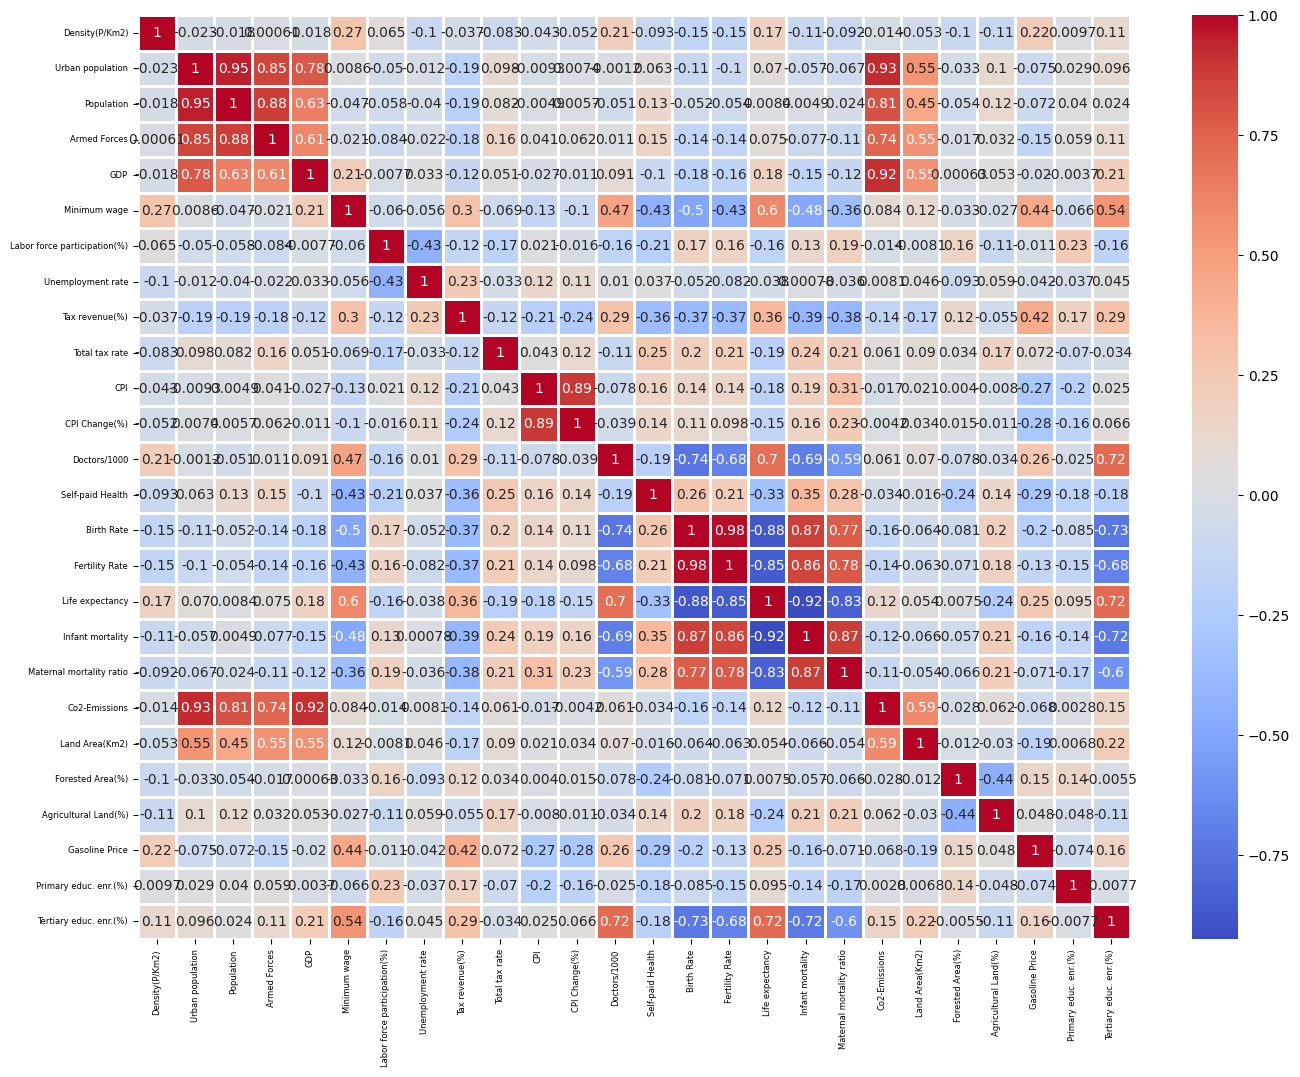

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

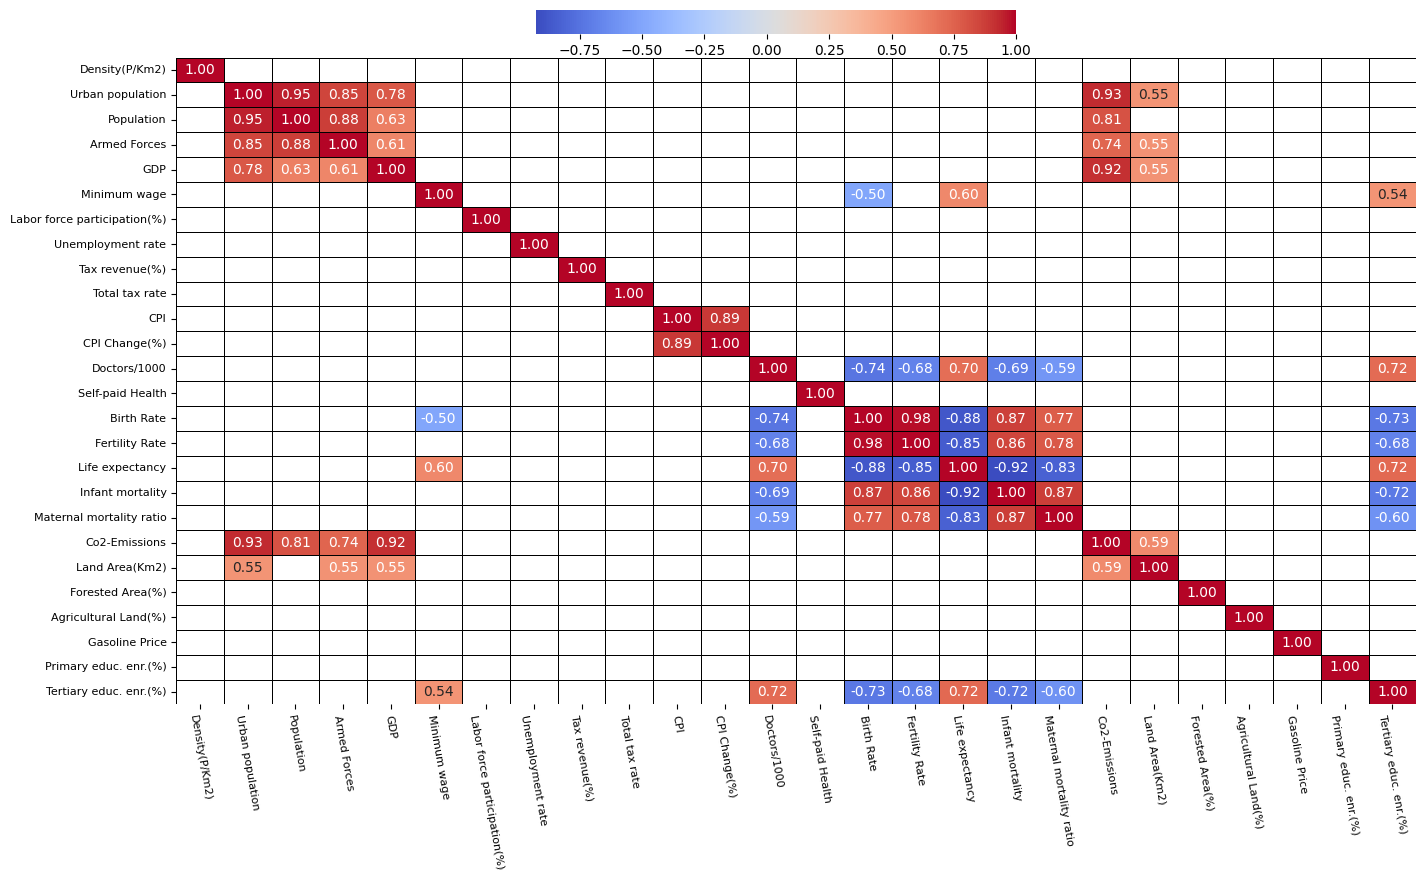

In [21]:
plt.figure(figsize=(16,12))
corr_matrix = raw_data.drop(['Country'],axis=1).corr()

mask = np.abs(corr_matrix) < 0.5 

ax = sns.heatmap(corr_matrix,cmap='coolwarm',linecolor='black',linewidths=0.5,annot=True,fmt=".2f",mask=mask,
                 cbar_kws={"orientation":"horizontal"})  
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.3, 0.9, 0.4, 0.02])  

plt.xticks(fontsize=8, rotation=280)  
plt.yticks(fontsize=8)
plt.show()

In [22]:
dataset = raw_data.drop(['Infant mortality','Land Area(Km2)','Co2-Emissions','CPI Change(%)','Fertility Rate',
                         'Doctors/1000','Gasoline Price','Minimum wage','Tertiary educ. enr.(%)',
                         'Maternal mortality ratio','Life expectancy','Tax revenue(%)','Population','Urban population'],axis=1)

In [23]:
dataset.dropna(inplace=True)

In [24]:
dataset.head()

Country  Density(P/Km2)  Armed Forces           GDP  \
0  Afghanistan            60.0      323000.0  1.910135e+10   
1      Albania           105.0        9000.0  1.527808e+10   
2      Algeria            18.0      317000.0  1.699882e+11   
4       Angola            26.0      117000.0  9.463542e+10   
6    Argentina            17.0      105000.0  4.496634e+11   

   Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
0                          48.9              11.12            71.4  149.90   
1                          55.7              12.33            36.6  119.05   
2                          41.2              11.70            66.1  151.36   
4                          77.5               6.89            49.1  261.73   
6                          61.3               9.79           106.3  232.75   

   Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0              78.4       32.49               2.1                  58.1   
1              56.9       11.78              28.1                  43.1   
2              28.1       24.28               0.8                  17.4   
4              33.4       40.73              46.3                  47.5   
6              17.6       17.02               9.8                  54.3   

   Primary educ. enr.(%)  
0                  104.0  
1                  107.0  
2                  109.9  
4                  113.5  
6                  109.7

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       159 non-null    object 
 1   Density(P/Km2)                159 non-null    float64
 2   Armed Forces                  159 non-null    float64
 3   GDP                           159 non-null    float64
 4   Labor force participation(%)  159 non-null    float64
 5   Unemployment rate             159 non-null    float64
 6   Total tax rate                159 non-null    float64
 7   CPI                           159 non-null    float64
 8   Self-paid Health              159 non-null    float64
 9   Birth Rate                    159 non-null    float64
 10  Forested Area(%)              159 non-null    float64
 11  Agricultural Land(%)          159 non-null    float64
 12  Primary educ. enr.(%)         159 non-null    float64
dtypes: float64

In [26]:
dataset.describe().round(2)

Density(P/Km2)  Armed Forces           GDP  \
count          159.00        159.00  1.590000e+02   
mean           212.67     157276.73  5.769626e+11   
std            709.94     379578.36  2.382609e+12   
min              2.00          0.00  1.340389e+09   
25%             31.50      11000.00  1.458843e+10   
50%             83.00      30000.00  5.374216e+10   
75%            151.50     137000.00  3.037876e+11   
max           8358.00    3031000.00  2.142770e+13   

       Labor force participation(%)  Unemployment rate  Total tax rate  \
count                        159.00             159.00          159.00   
mean                          62.76               6.76           39.84   
std                           10.30               4.91           15.39   
min                           38.00               0.09            8.00   
25%                           56.35               3.39           30.60   
50%                           62.20               5.36           37.60   
75%                           69.10               9.09           47.60   
max                           86.80              28.18          106.30   

           CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
count   159.00            159.00      159.00            159.00   
mean    171.17             33.61       20.30             30.32   
std     232.85             18.43        9.98             23.03   
min      99.03              5.30        6.40              0.00   
25%     115.12             18.35       11.15             10.25   
50%     129.00             32.10       18.07             31.10   
75%     160.70             44.05       28.70             46.60   
max    2740.27             81.60       46.08             98.30   

       Agricultural Land(%)  Primary educ. enr.(%)  
count                159.00                 159.00  
mean                  39.39                 103.08  
std                   21.79                  11.86  
min                    0.60                  61.80  
25%                   22.65                  98.90  
50%                   39.70                 102.30  
75%                   55.05                 107.55  
max                   82.60                 142.50

## correlation studies

In [27]:
dataset.drop(['Country',],axis=1).corr()

Density(P/Km2)  Armed Forces       GDP  \
Density(P/Km2)                      1.000000     -0.001290 -0.009600   
Armed Forces                       -0.001290      1.000000  0.632126   
GDP                                -0.009600      0.632126  1.000000   
Labor force participation(%)        0.075252     -0.137519 -0.007924   
Unemployment rate                  -0.115721     -0.000509  0.040901   
Total tax rate                     -0.154217      0.157641  0.089287   
CPI                                -0.044625      0.062395 -0.029068   
Self-paid Health                    0.019932      0.154227 -0.126398   
Birth Rate                         -0.151535     -0.141867 -0.199365   
Forested Area(%)                   -0.120491     -0.026107  0.017478   
Agricultural Land(%)               -0.115463      0.053817  0.053015   
Primary educ. enr.(%)              -0.000878      0.038789 -0.017315   

                              Labor force participation(%)  Unemployment rate  \
Density(P/Km2)                                    0.075252          -0.115721   
Armed Forces                                     -0.137519          -0.000509   
GDP                                              -0.007924           0.040901   
Labor force participation(%)                      1.000000          -0.468224   
Unemployment rate                                -0.468224           1.000000   
Total tax rate                                   -0.154065           0.010612   
CPI                                              -0.077797           0.113466   
Self-paid Health                                 -0.221524           0.025243   
Birth Rate                                        0.191435          -0.030089   
Forested Area(%)                                  0.153208          -0.129999   
Agricultural Land(%)                             -0.081907           0.089747   
Primary educ. enr.(%)                             0.254945          -0.000760   

                              Total tax rate       CPI  Self-paid Health  \
Density(P/Km2)                     -0.154217 -0.044625          0.019932   
Armed Forces                        0.157641  0.062395          0.154227   
GDP                                 0.089287 -0.029068         -0.126398   
Labor force participation(%)       -0.154065 -0.077797         -0.221524   
Unemployment rate                   0.010612  0.113466          0.025243   
Total tax rate                      1.000000  0.196494          0.188749   
CPI                                 0.196494  1.000000          0.124984   
Self-paid Health                    0.188749  0.124984          1.000000   
Birth Rate                          0.214598  0.089229          0.298011   
Forested Area(%)                    0.054069  0.020231         -0.185440   
Agricultural Land(%)                0.093923 -0.021508          0.079904   
Primary educ. enr.(%)              -0.011856 -0.055503         -0.160868   

                              Birth Rate  Forested Area(%)  \
Density(P/Km2)                 -0.151535         -0.120491   
Armed Forces                   -0.141867         -0.026107   
GDP                            -0.199365          0.017478   
Labor force participation(%)    0.191435          0.153208   
Unemployment rate              -0.030089         -0.129999   
Total tax rate                  0.214598          0.054069   
CPI                             0.089229          0.020231   
Self-paid Health                0.298011         -0.185440   
Birth Rate                      1.000000         -0.068833   
Forested Area(%)               -0.068833          1.000000   
Agricultural Land(%)            0.166205         -0.418072   
Primary educ. enr.(%)           0.051584          0.124985   

                              Agricultural Land(%)  Primary educ. enr.(%)  
Density(P/Km2)                           -0.115463              -0.000878  
Armed Forces                              0.053817               0.038789  
GDP            

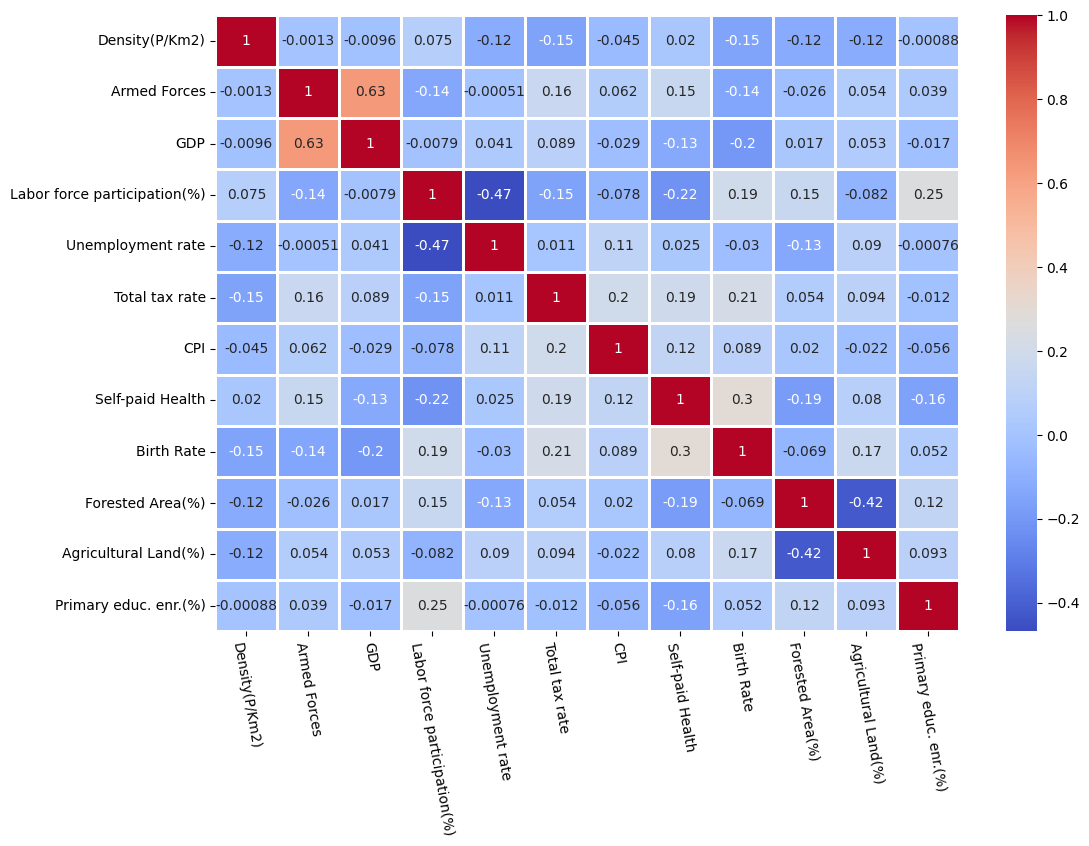

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(rotation=280)  
plt.show()

# EDA

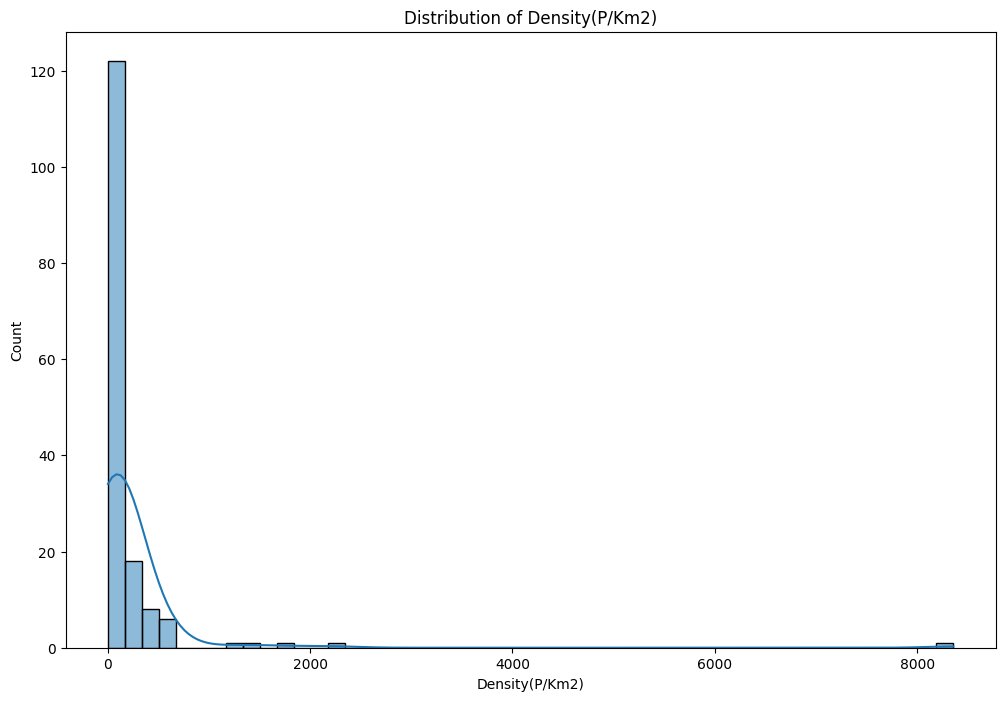

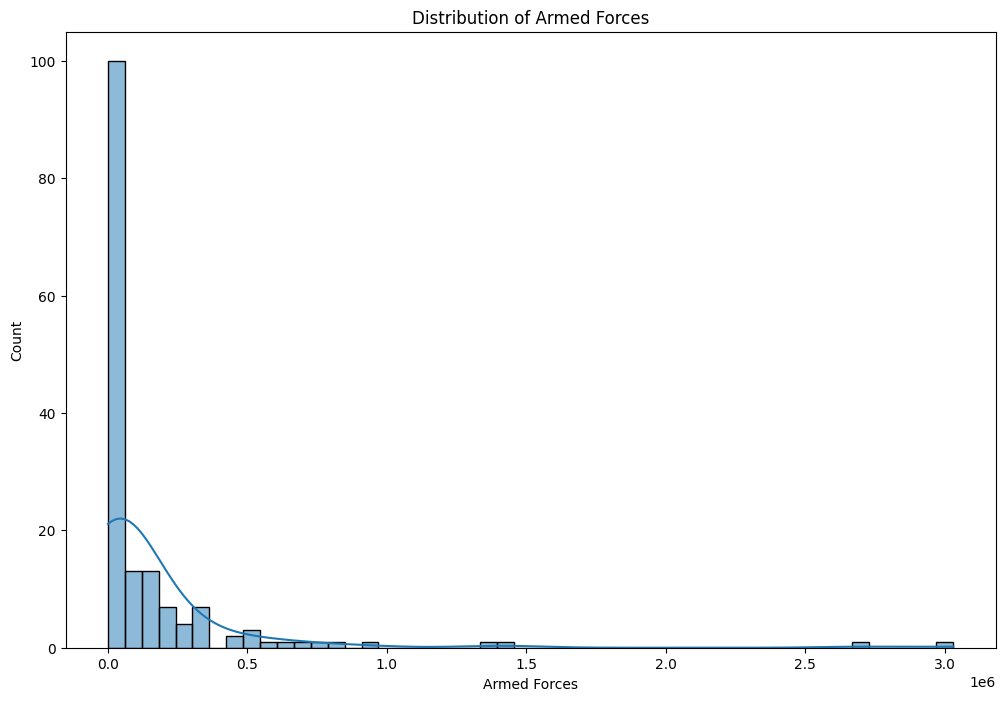

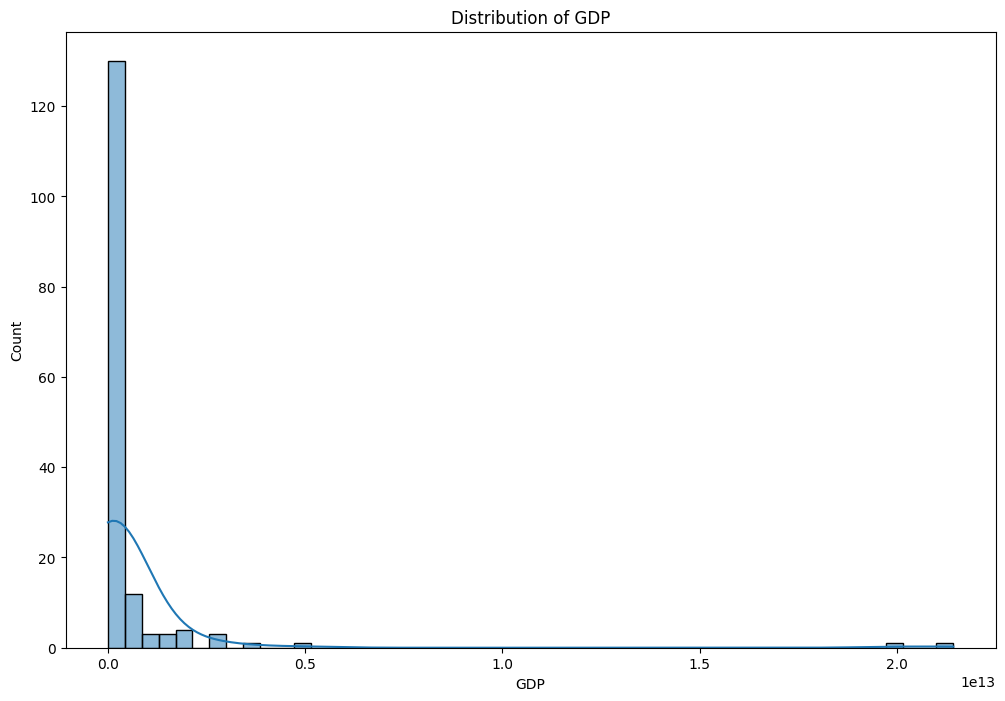

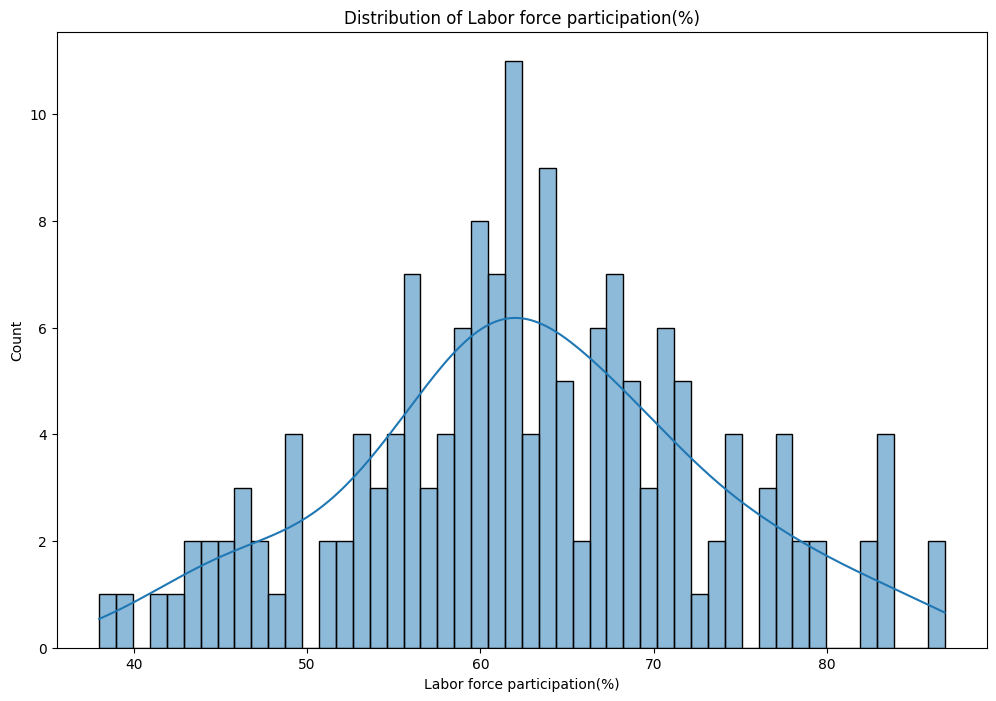

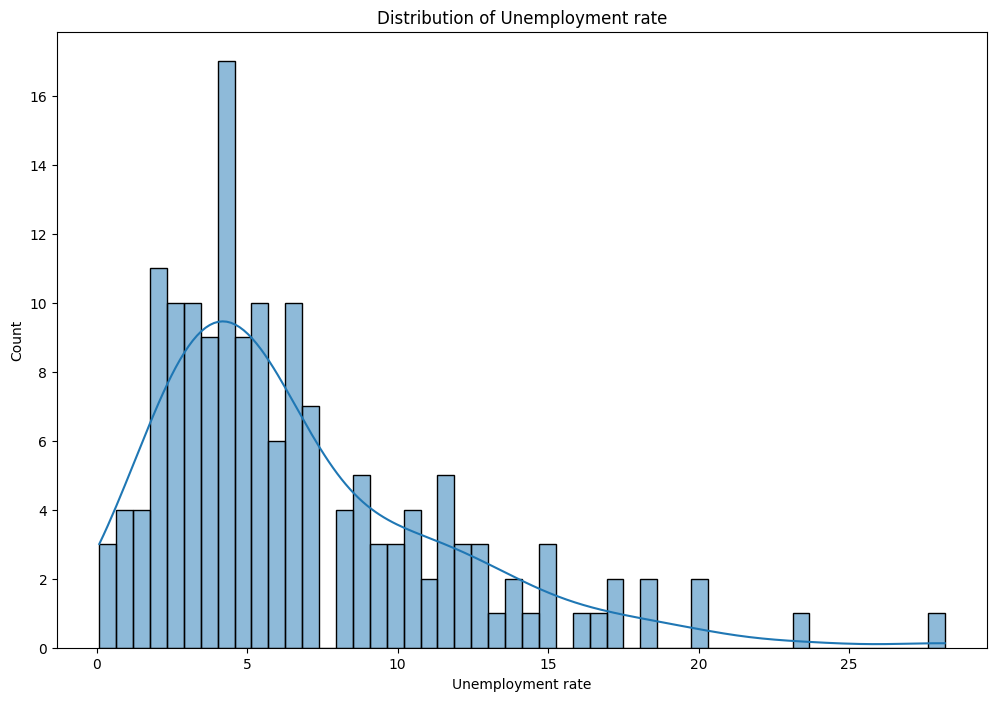

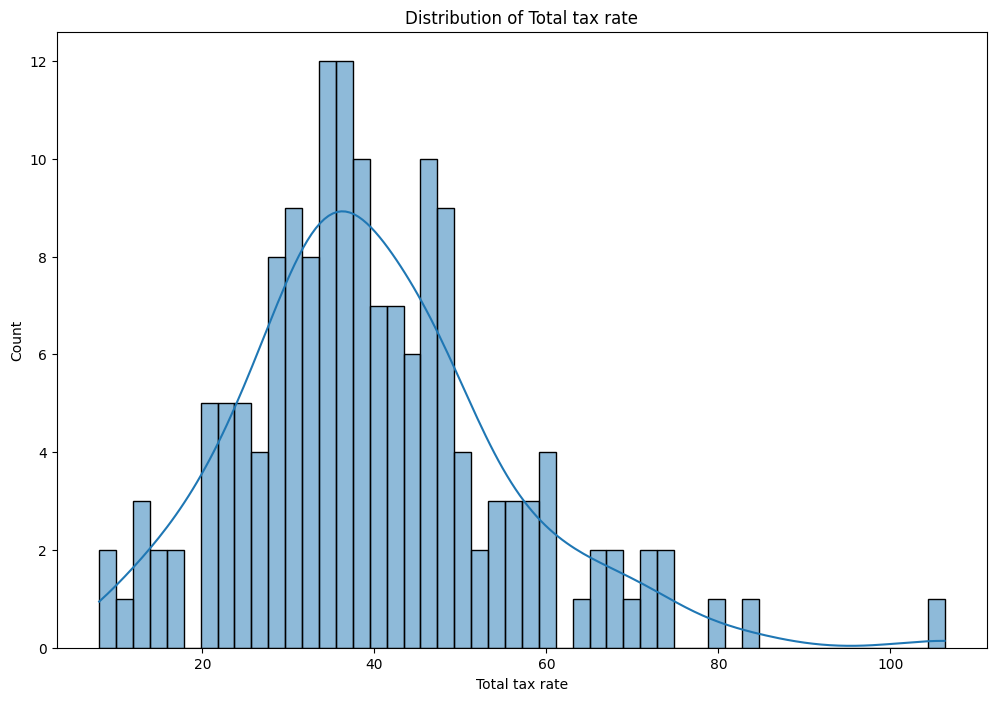

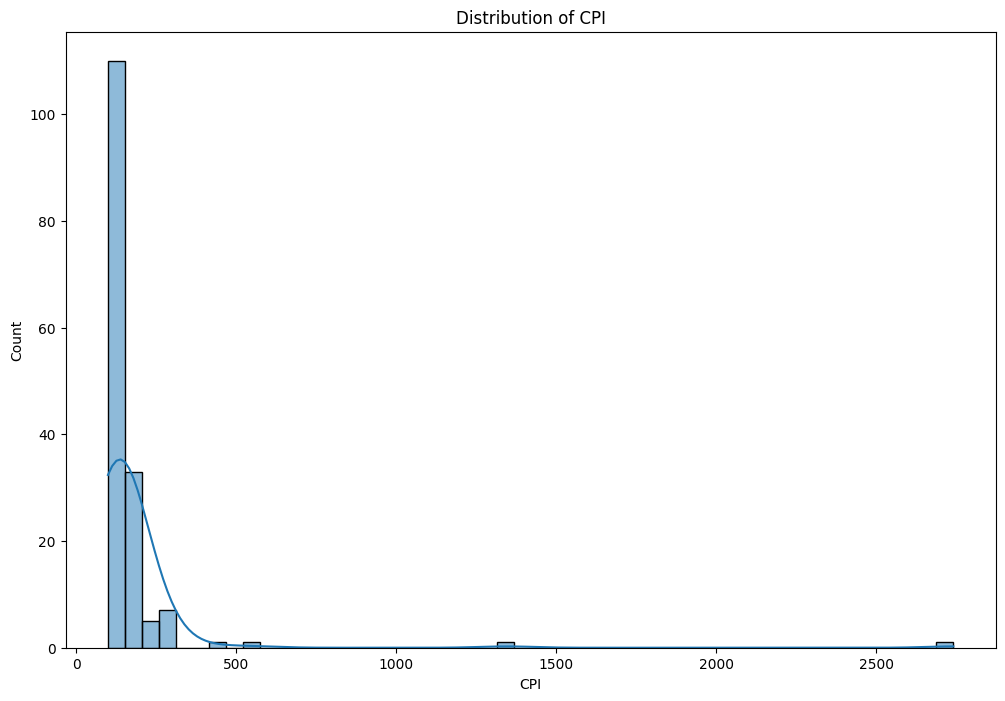

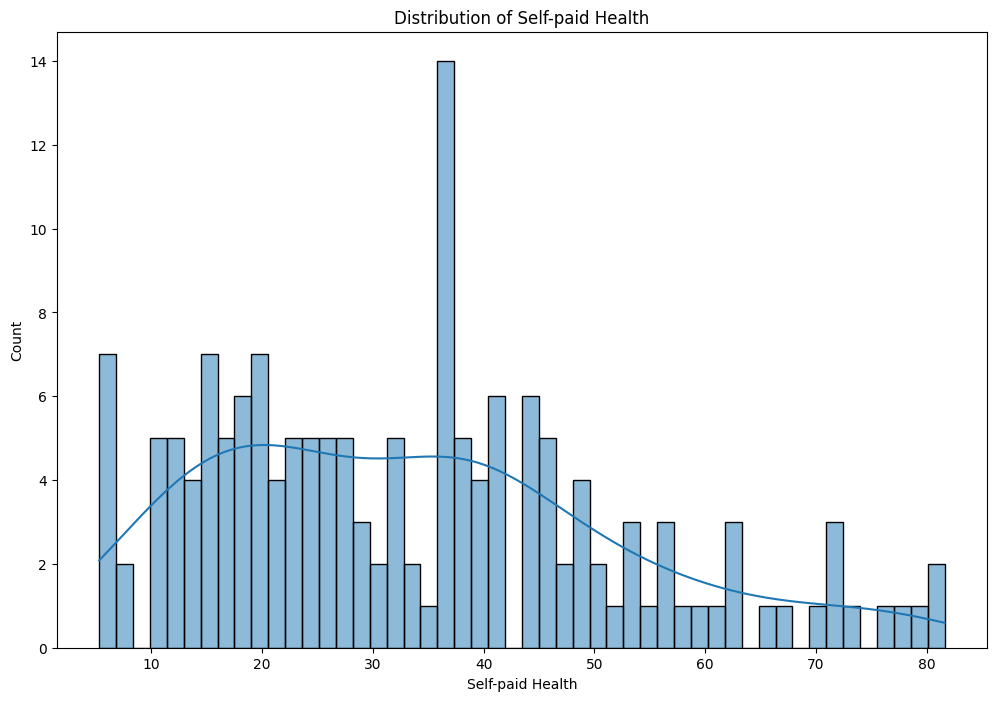

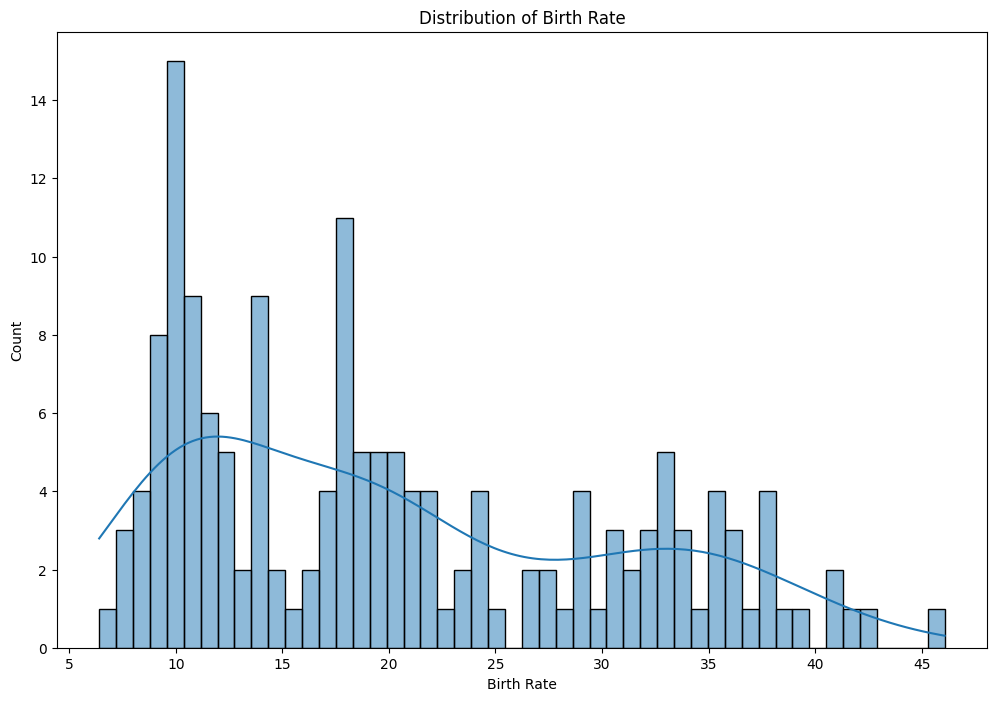

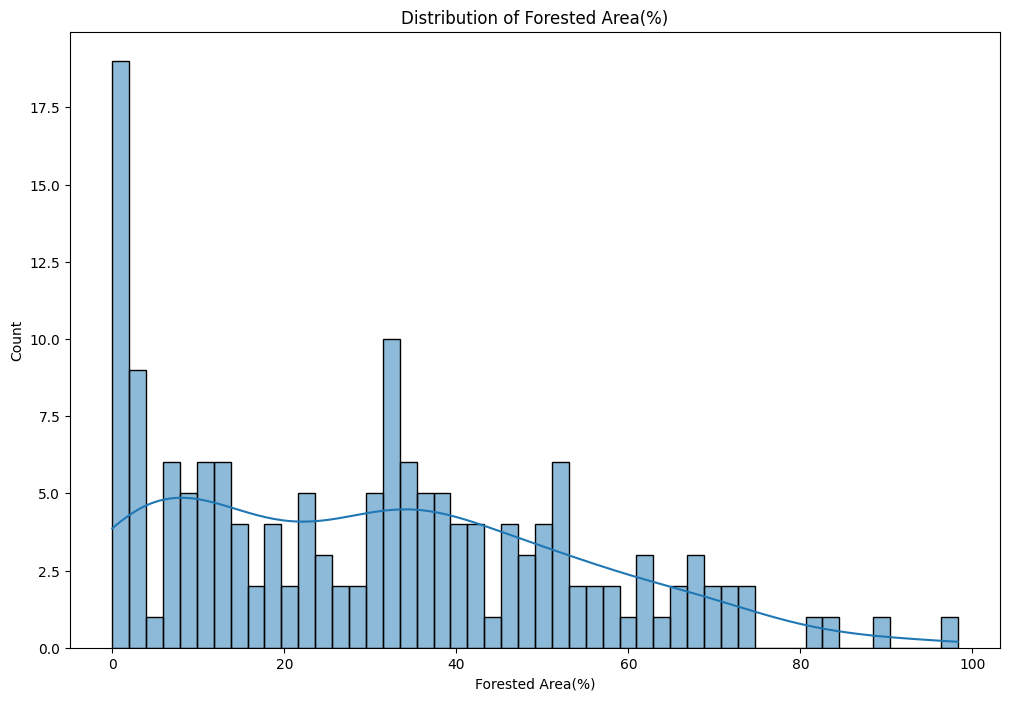

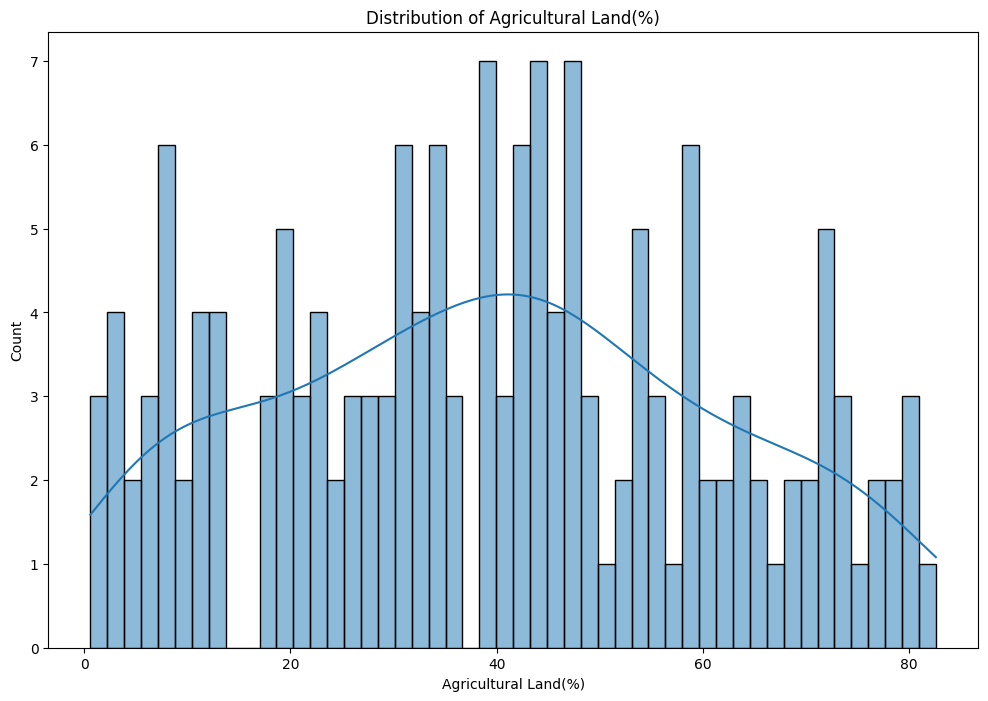

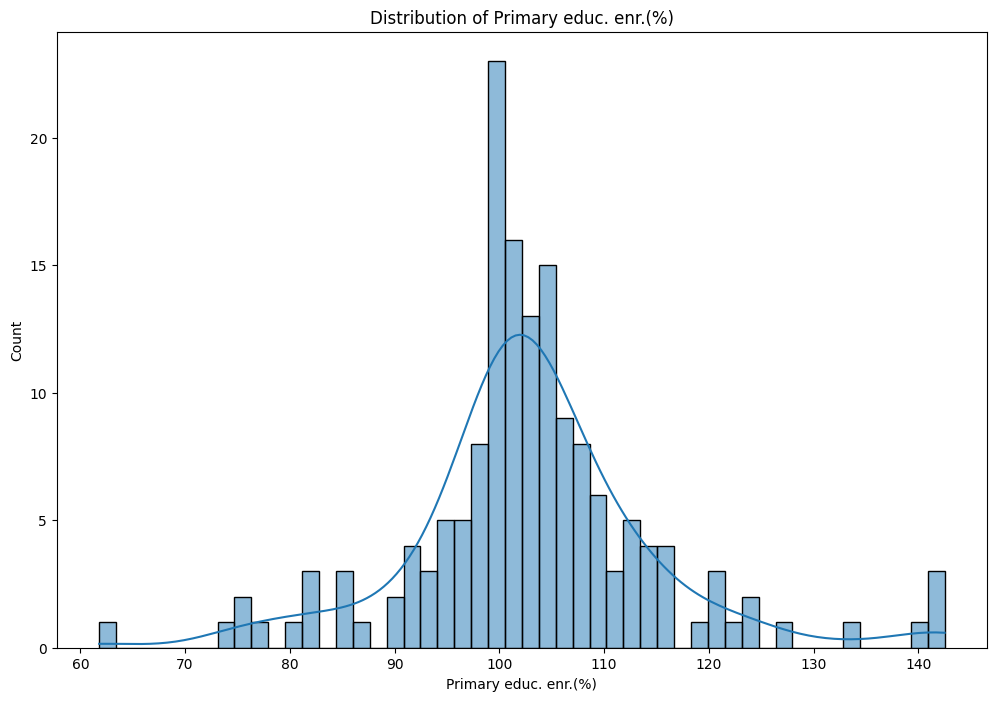

In [29]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

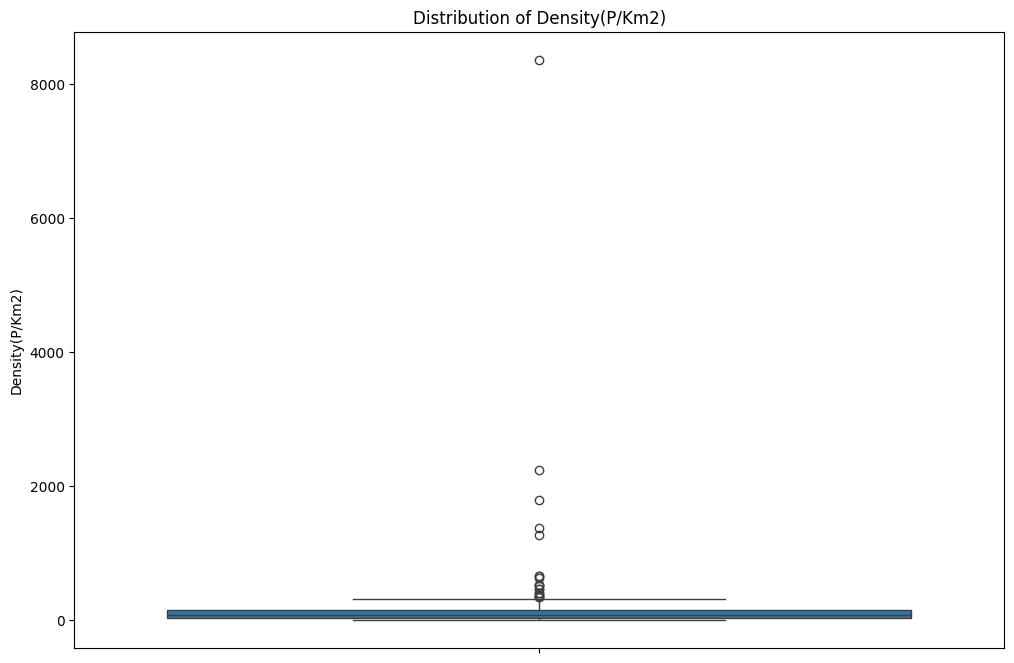

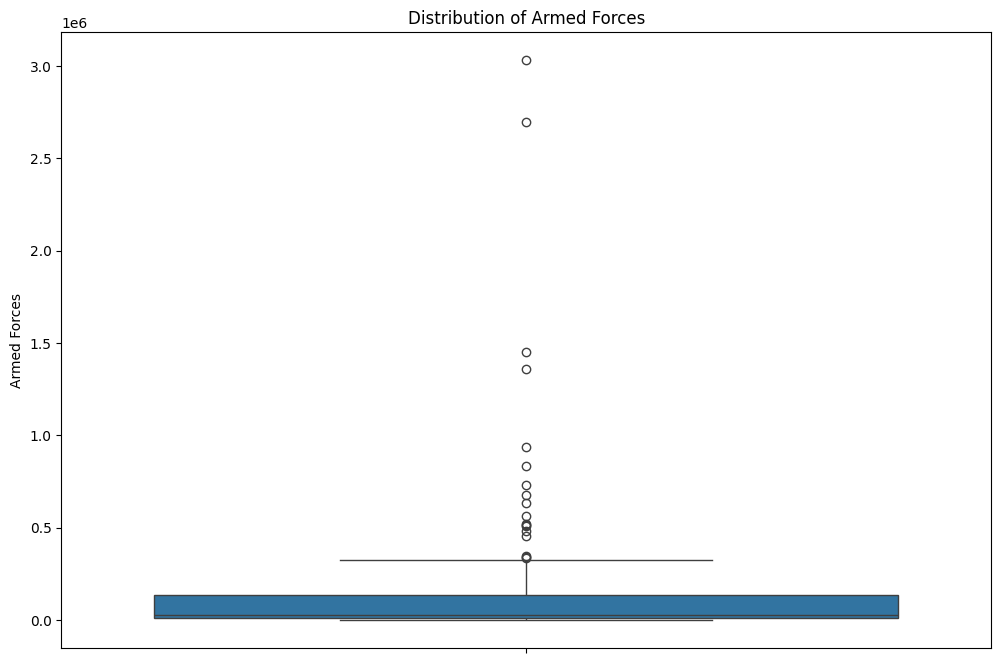

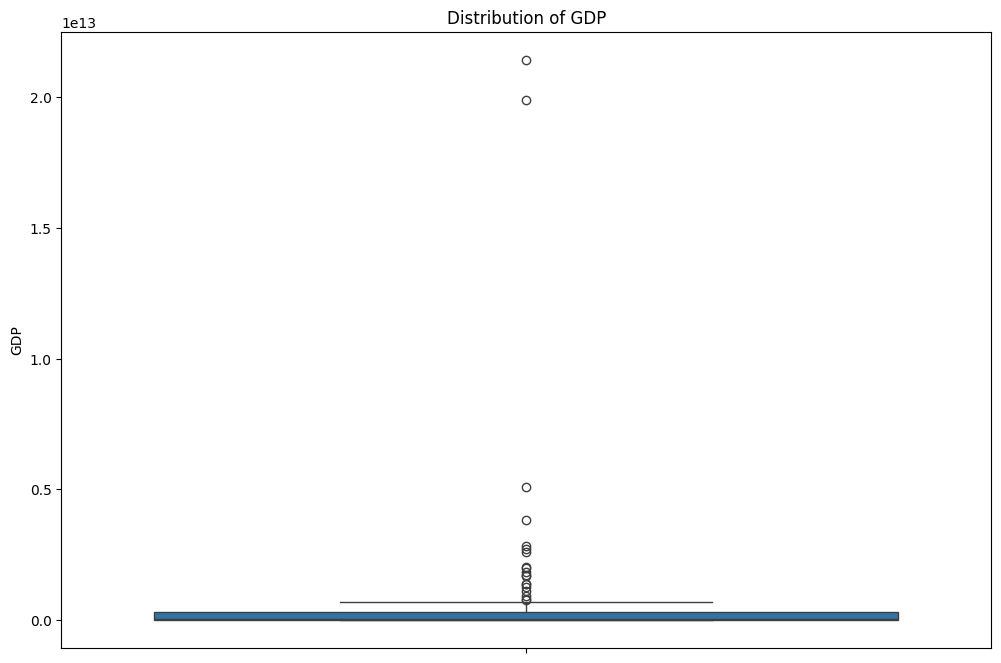

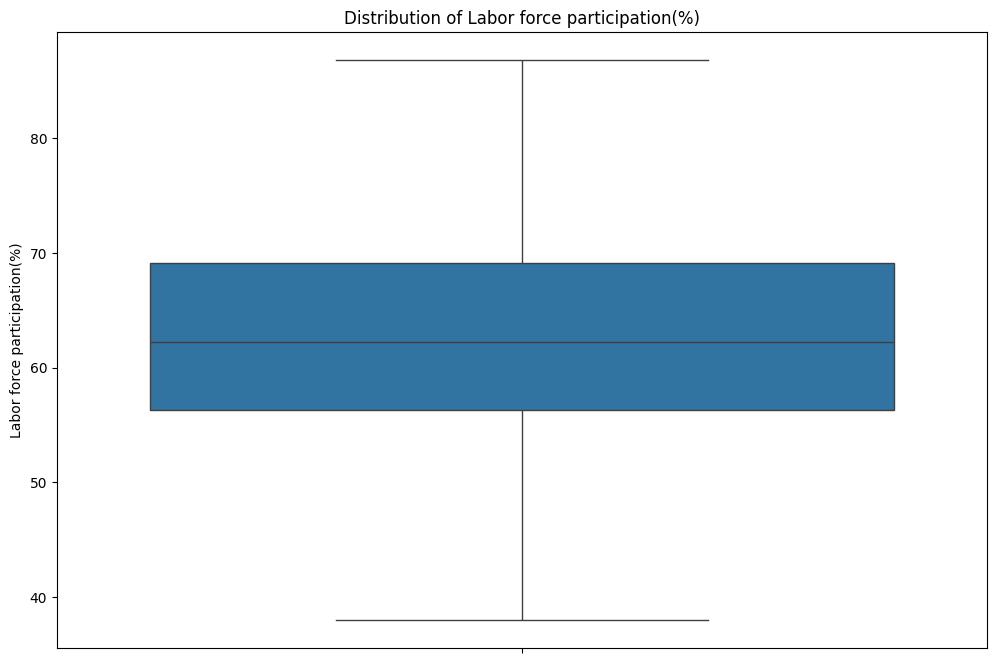

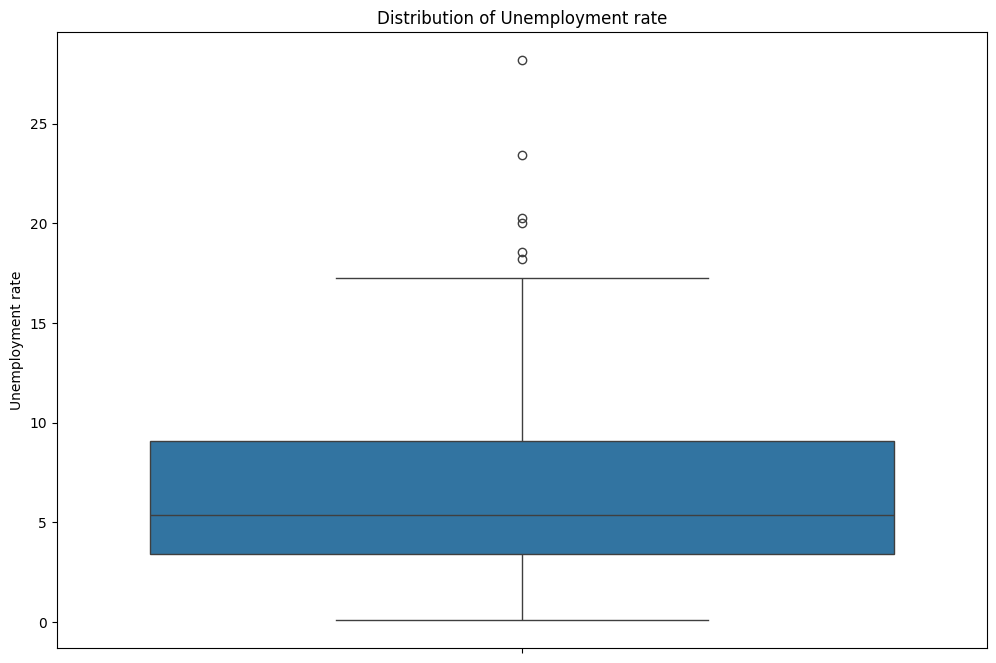

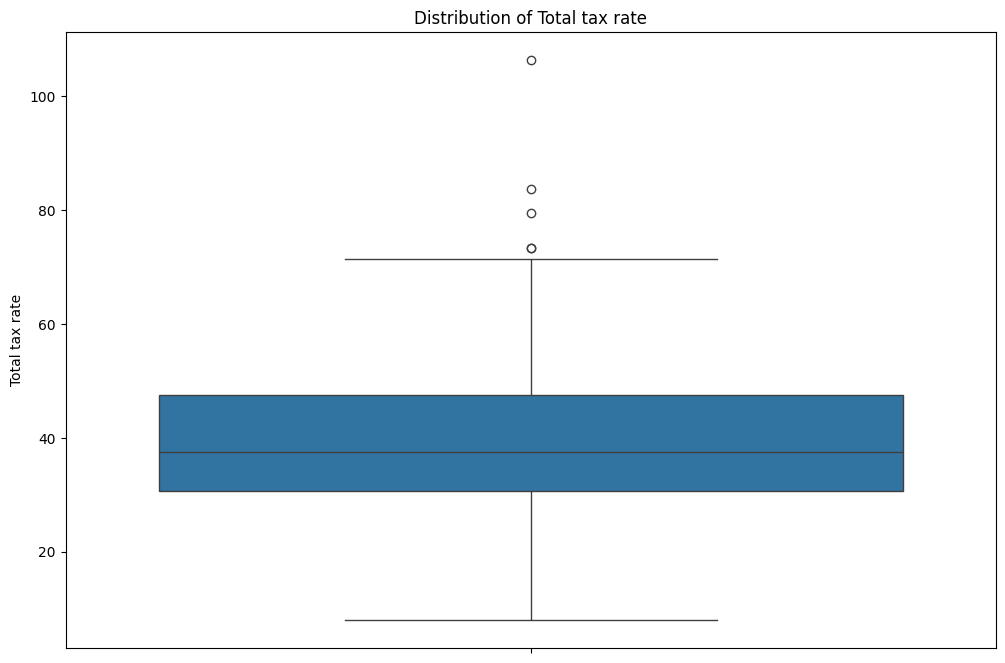

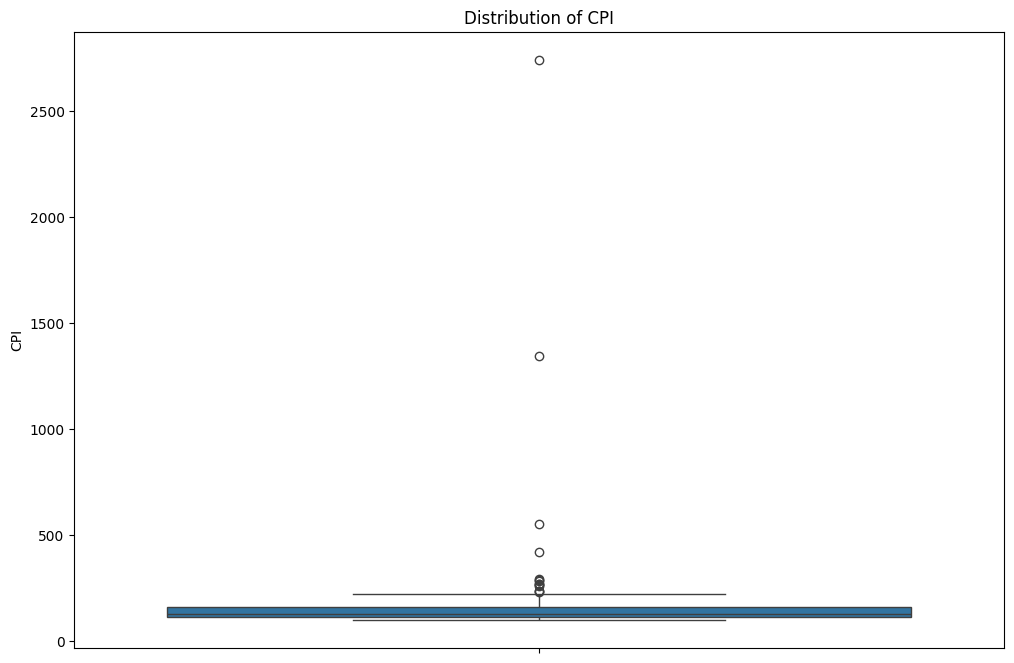

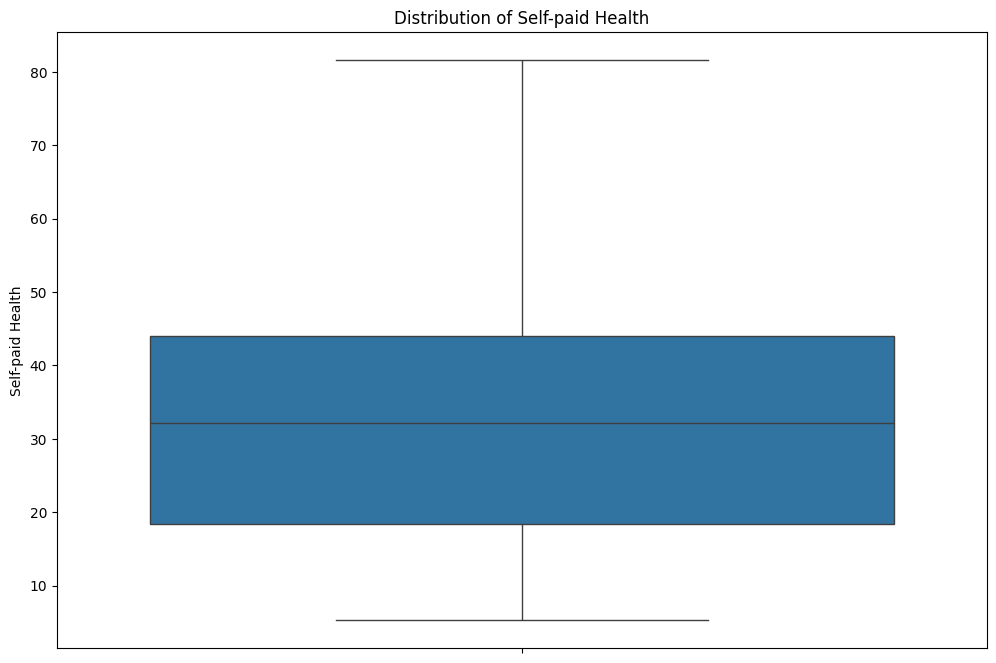

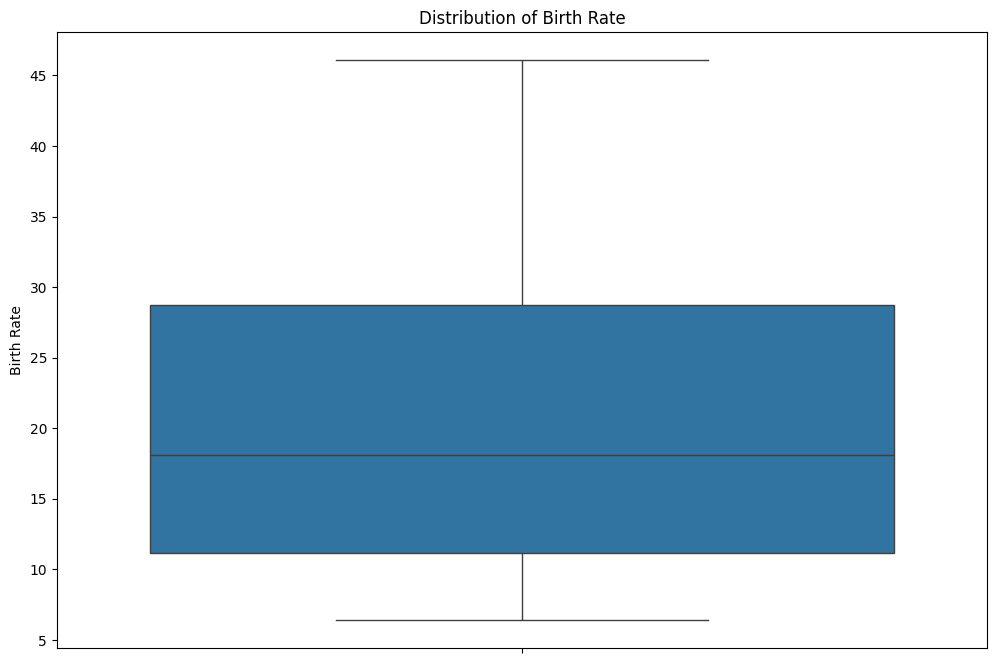

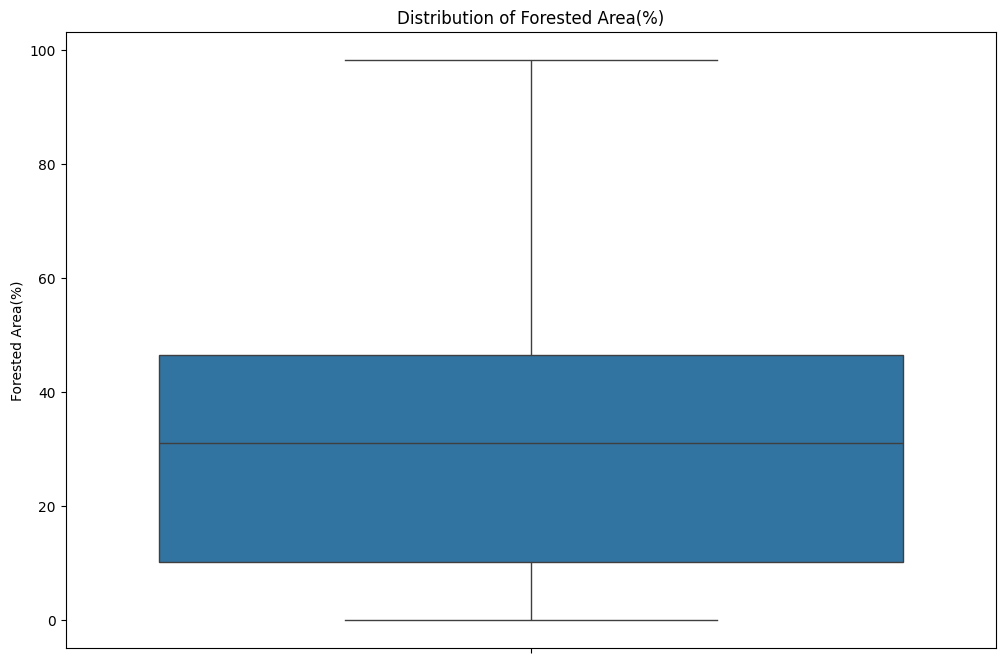

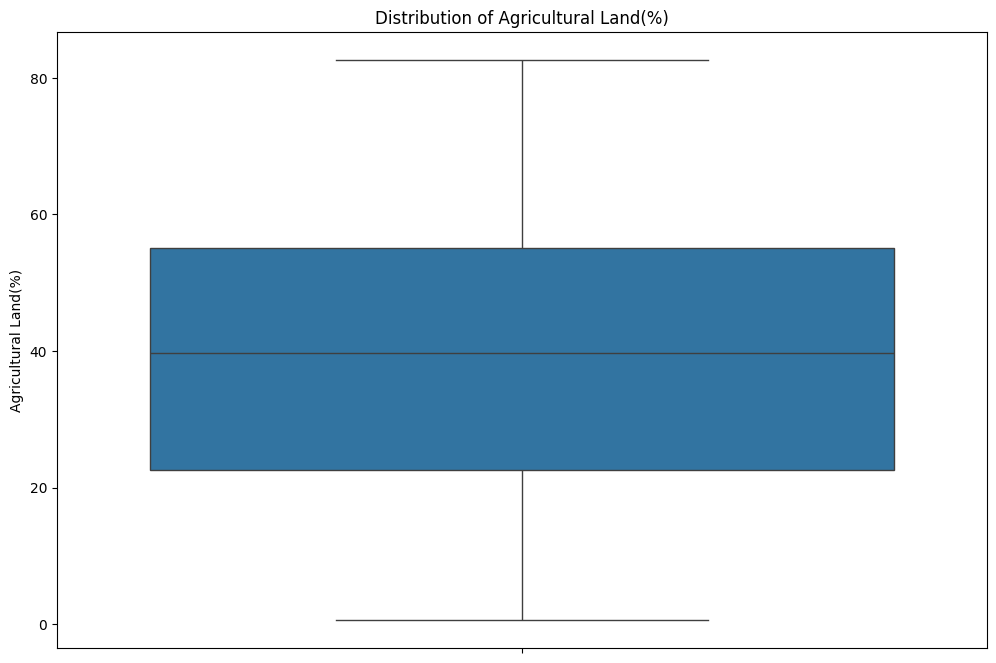

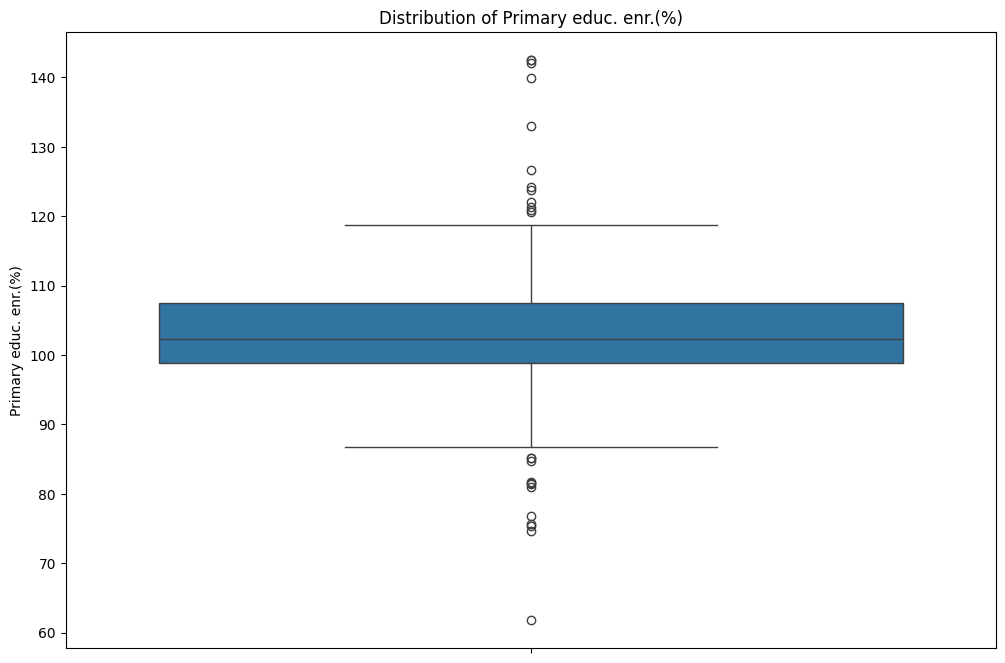

In [30]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(dataset[i])
    plt.title(f'Distribution of {i}')
    plt.show()

## outliers detection

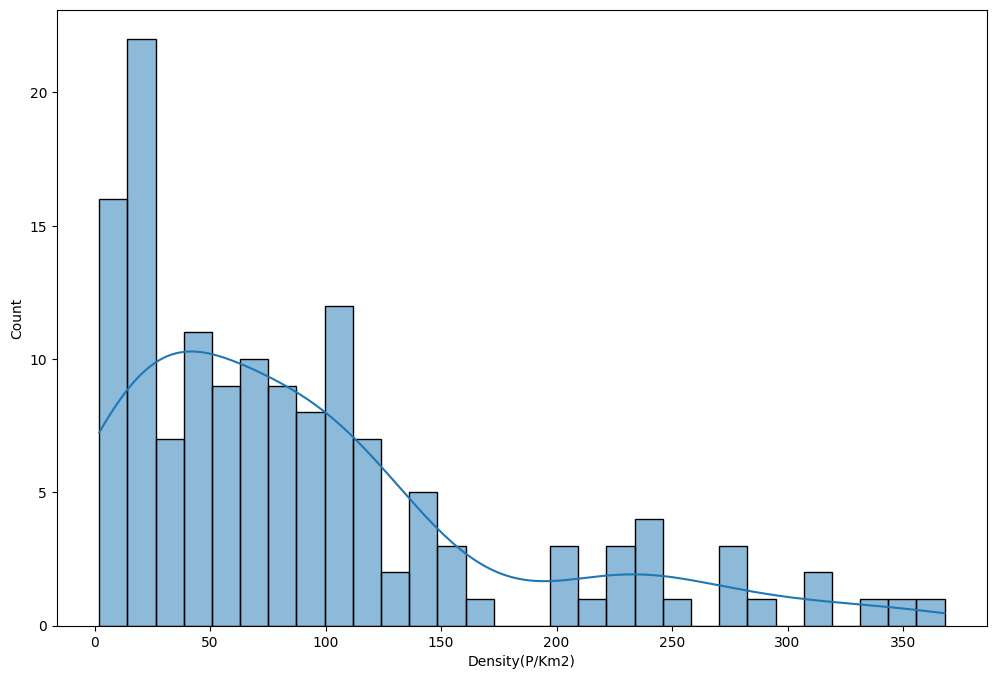

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.90)]['Density(P/Km2)'],
             kde=True,bins=30)
plt.show()

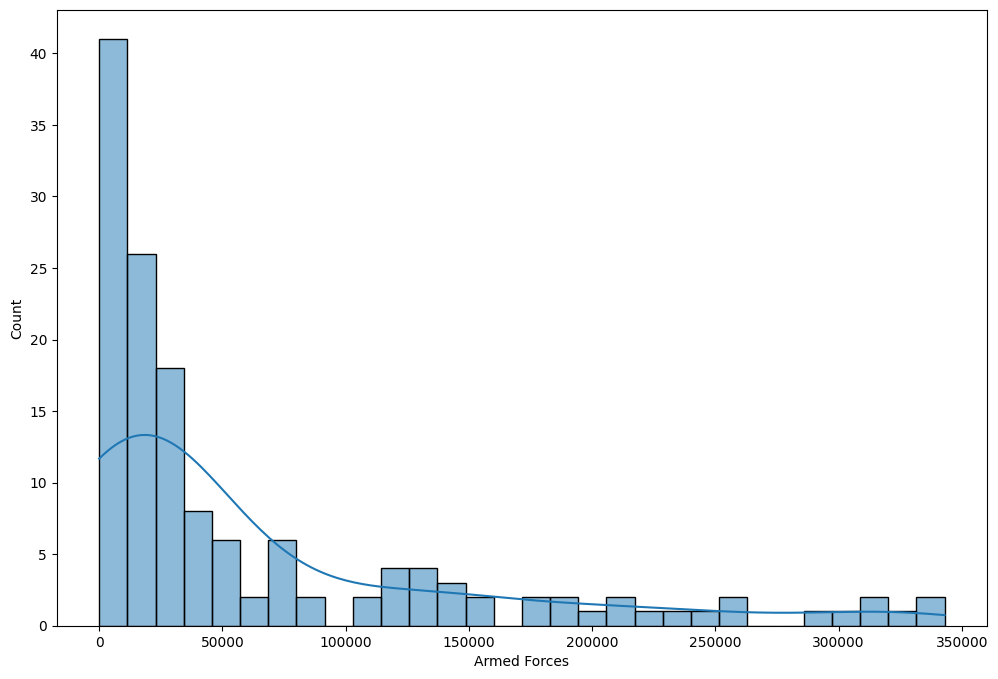

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.90)]['Armed Forces'],
             kde=True,bins=30)
plt.show()

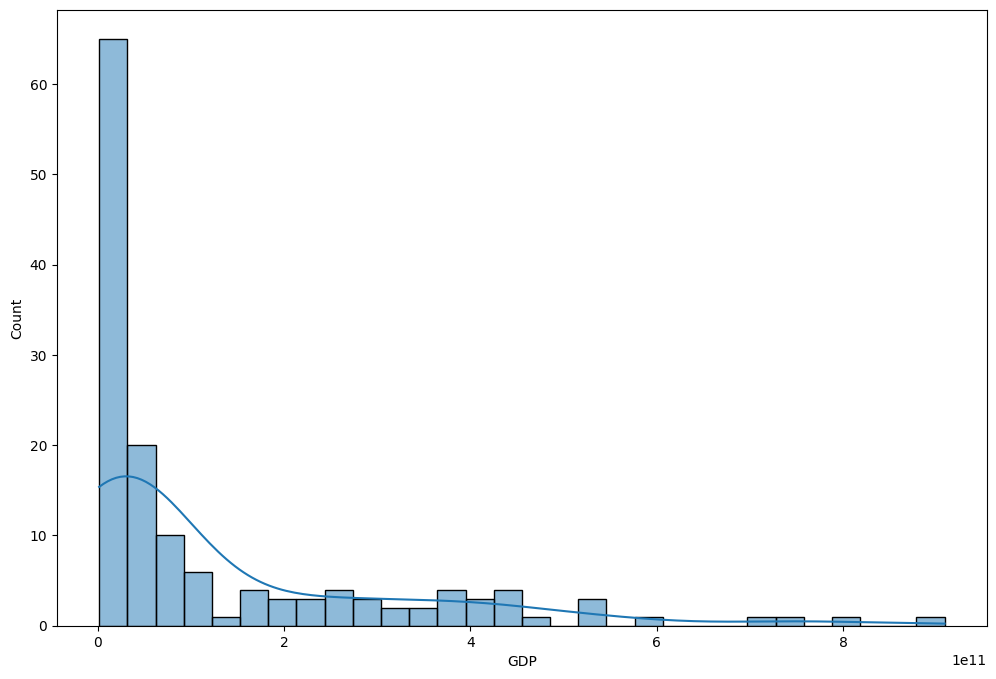

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['GDP'] < dataset['GDP'].quantile(0.90)]['GDP'],
             kde=True,bins=30)
plt.show()

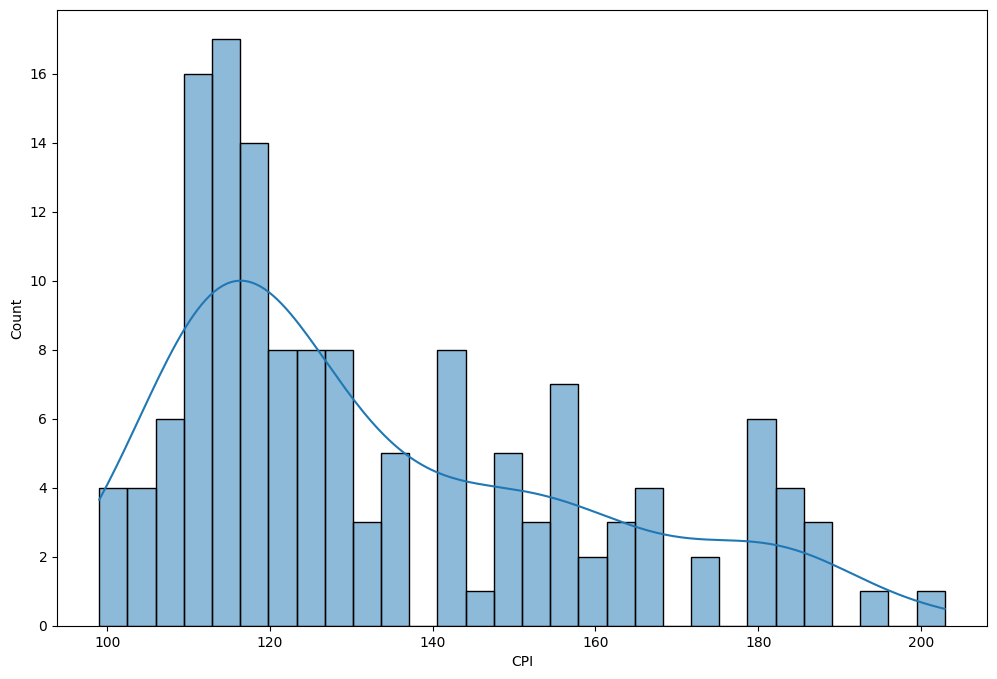

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['CPI'] < dataset['CPI'].quantile(0.90)]['CPI'],
             kde=True,bins=30)
plt.show()

In [35]:
dataset[dataset['Density(P/Km2)'] > dataset['Density(P/Km2)'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
12     Bahrain          2239.0       19000.0  3.857407e+10   
156  Singapore          8358.0       81000.0  3.720625e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
12                           73.4               0.71            13.8  117.59   
156                          70.5               4.11            21.0  114.41   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
12               25.1       13.99               0.8                  11.1   
156              36.7        8.80              23.1                   0.9   

     Primary educ. enr.(%)  
12                    99.4  
156                  100.6

In [36]:
dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
114  Mongolia             2.0       18000.0  1.385285e+10   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
114                          59.7               6.01            25.7  195.76   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
114              39.3       24.13               8.0                  71.5   

     Primary educ. enr.(%)  
114                  104.0

In [37]:
dataset[dataset['Armed Forces'] > dataset['Armed Forces'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36   China           153.0     2695000.0  1.991000e+13   
77   India           464.0     3031000.0  2.611000e+12   

    Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                          68.0               4.32            59.2  125.08   
77                          49.3               5.36            49.7  180.44   

    Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36              32.4       10.90              22.4                  56.2   
77              65.1       17.86              23.8                  60.4   

    Primary educ. enr.(%)  
36                  100.2  
77                  113.0

In [38]:
dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.01)]

Empty DataFrame
Columns: [Country, Density(P/Km2), Armed Forces, GDP, Labor force participation(%), Unemployment rate, Total tax rate, CPI, Self-paid Health, Birth Rate, Forested Area(%), Agricultural Land(%), Primary educ. enr.(%)]
Index: []

In [39]:
dataset[dataset['GDP'] > dataset['GDP'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36           China           153.0     2695000.0  1.991000e+13   
186  United States            36.0     1359000.0  2.142770e+13   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                           68.0               4.32            59.2  125.08   
186                          62.0              14.70            36.6  117.24   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36               32.4        10.9              22.4                  56.2   
186              11.1        11.6              33.9                  44.4   

     Primary educ. enr.(%)  
36                   100.2  
186                  101.8

In [40]:
dataset[dataset['GDP'] < dataset['GDP'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
70   Guinea-Bissau            70.0        4000.0  1.340389e+09   
174     East Timor            89.0        2000.0  1.673540e+09   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
70                           72.0               2.47            45.5  111.65   
174                          67.3               4.55            17.3  145.38   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
70               37.2       35.13              69.8                  58.0   
174              10.2       29.42              45.4                  25.6   

     Primary educ. enr.(%)  
70                   118.7  
174                  115.3

In [41]:
dataset[dataset['CPI'] > dataset['CPI'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
166      Sudan            25.0      124000.0  1.890228e+10   
190  Venezuela            32.0      343000.0  4.823593e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate      CPI  \
166                          48.4              16.53            45.4  1344.19   
190                          59.7               8.80            73.3  2740.27   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
166              63.2       32.18               8.1                  28.7   
190              45.8       17.88              52.7                  24.5   

     Primary educ. enr.(%)  
166                   76.8  
190                   97.2

In [42]:
dataset[dataset['CPI'] < dataset['CPI'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
24        Brunei            83.0        8000.0  1.346942e+10   
169  Switzerland           219.0       21000.0  7.030824e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate    CPI  \
24                           64.7               9.12             8.0  99.03   
169                          68.3               4.58            28.8  99.55   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
24                6.0        14.9              72.1                   2.7   
169              28.3        10.0              31.8                  38.4   

     Primary educ. enr.(%)  
24                   103.2  
169                  105.2

## logarithmic trasformations

In [43]:
for i in dataset[['Density(P/Km2)','Armed Forces','GDP','CPI']].columns:
    dataset[i] = np.log1p(dataset[i]) # log(1+x)

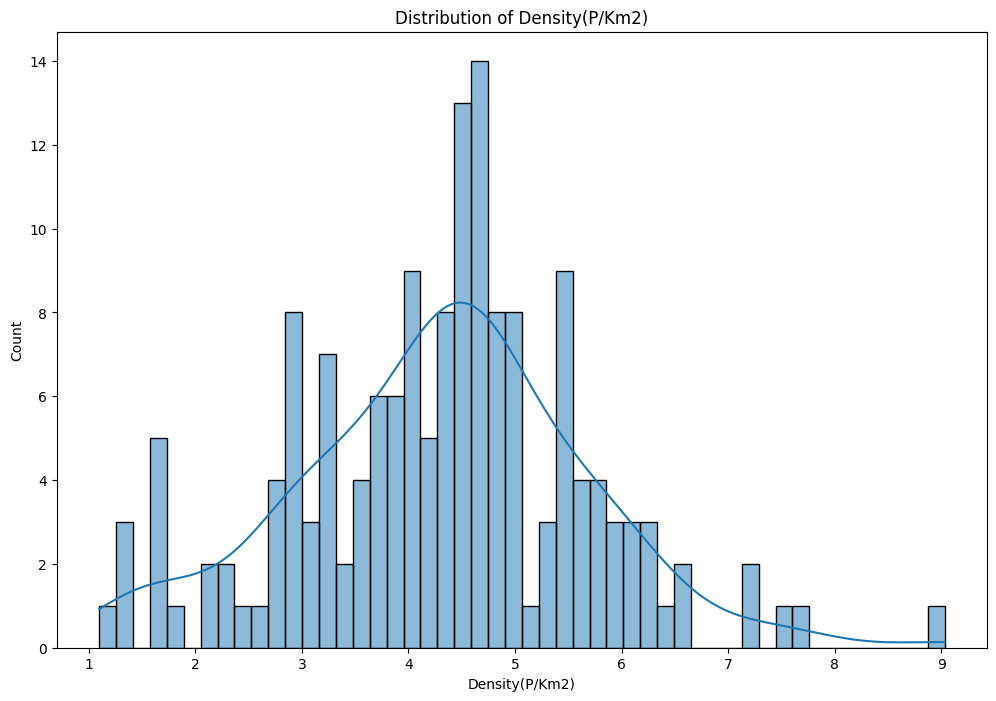

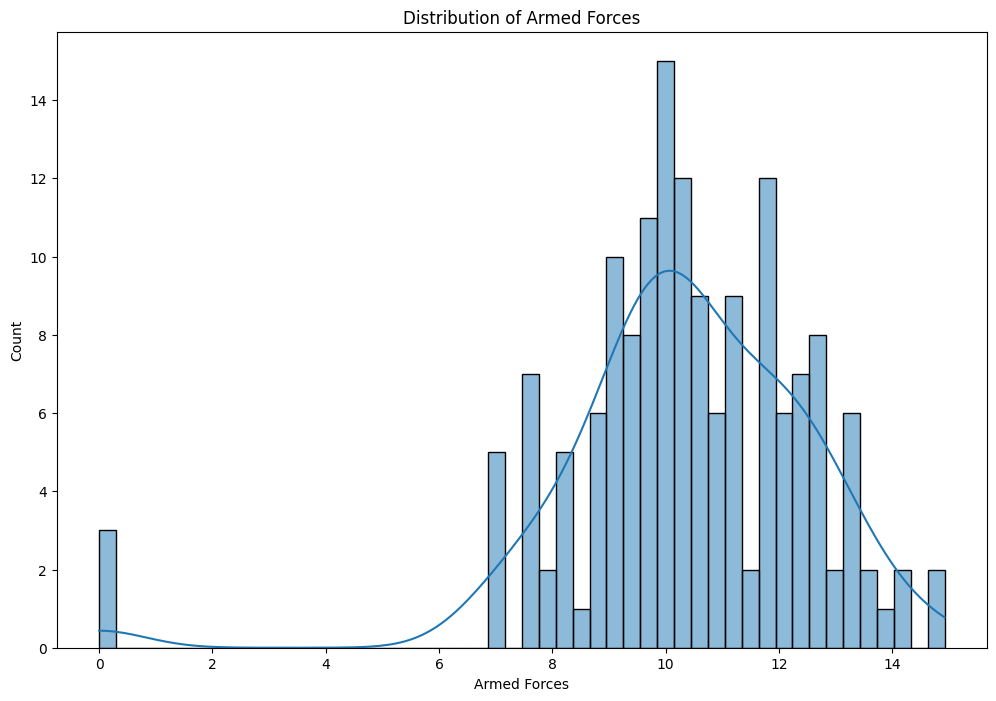

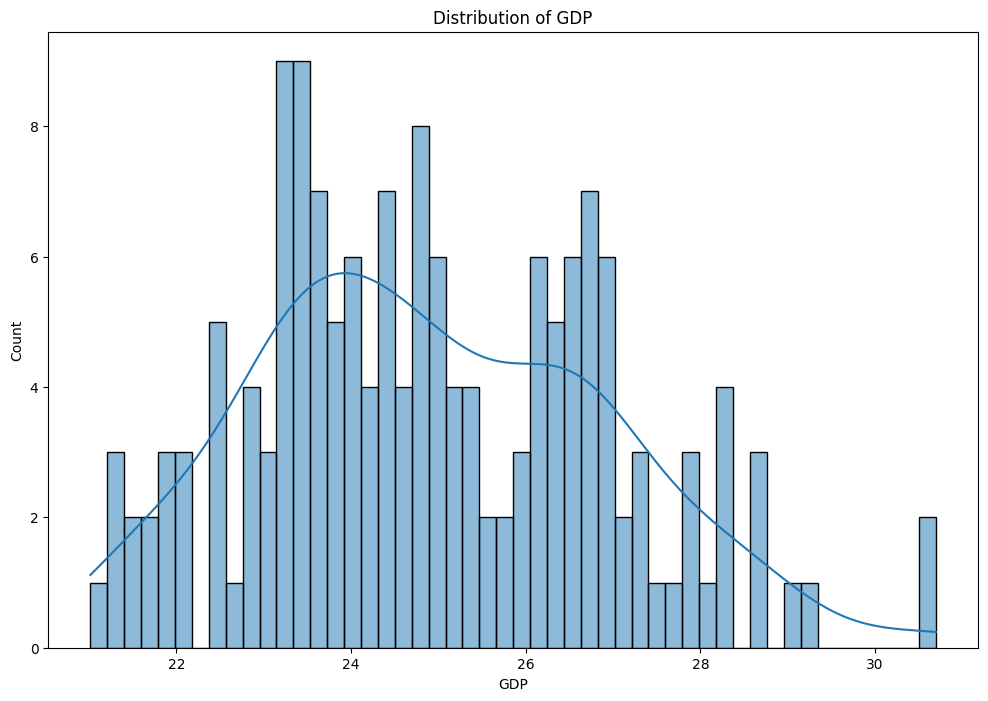

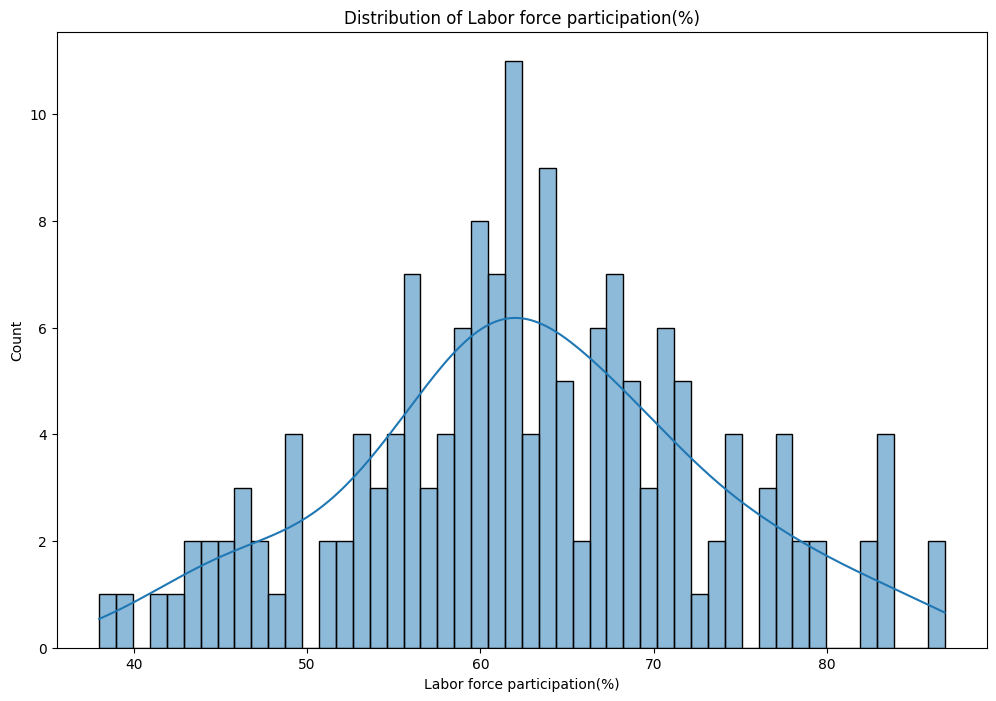

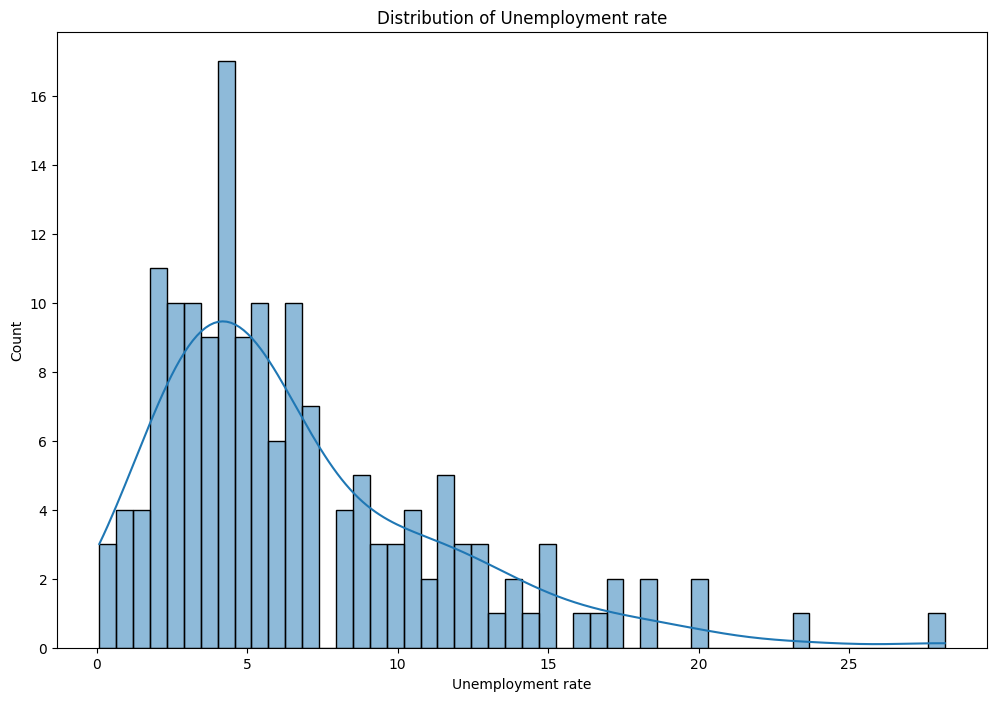

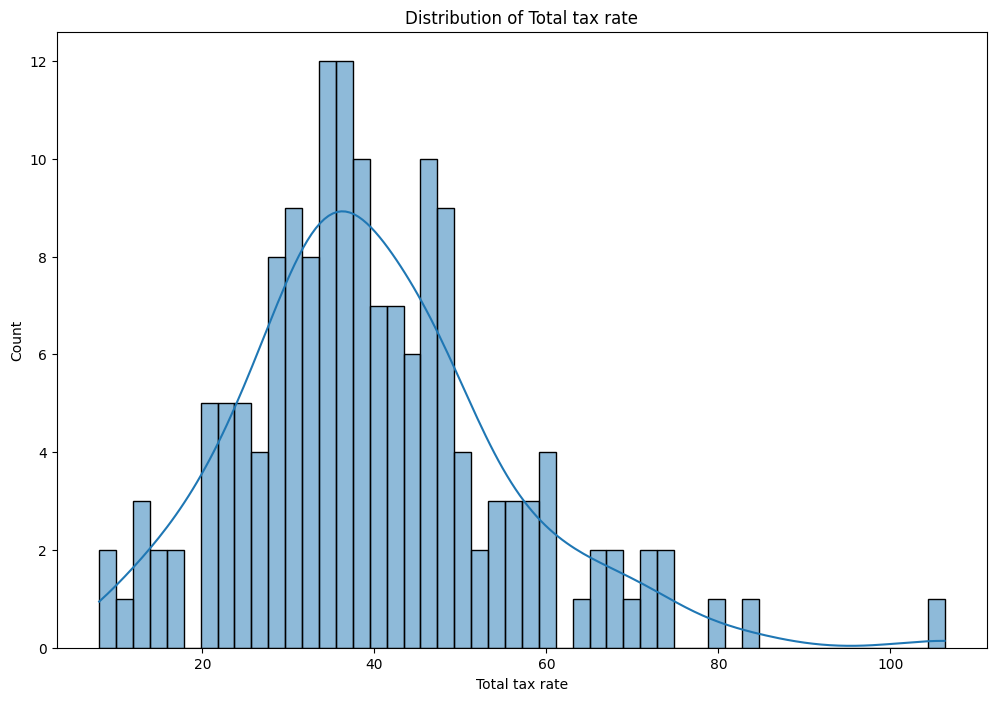

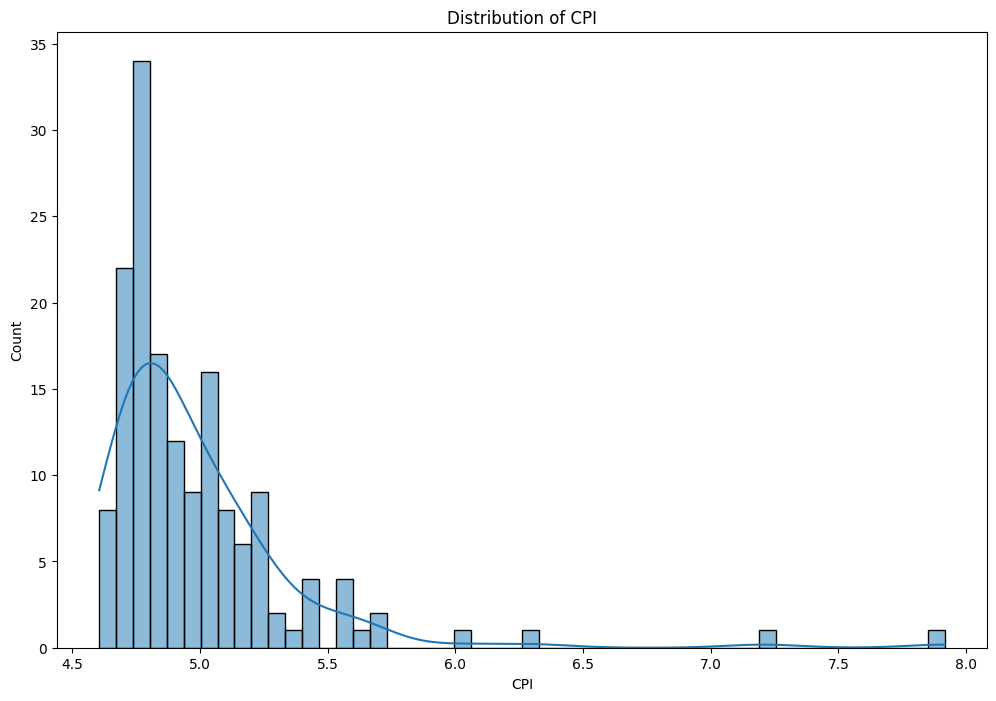

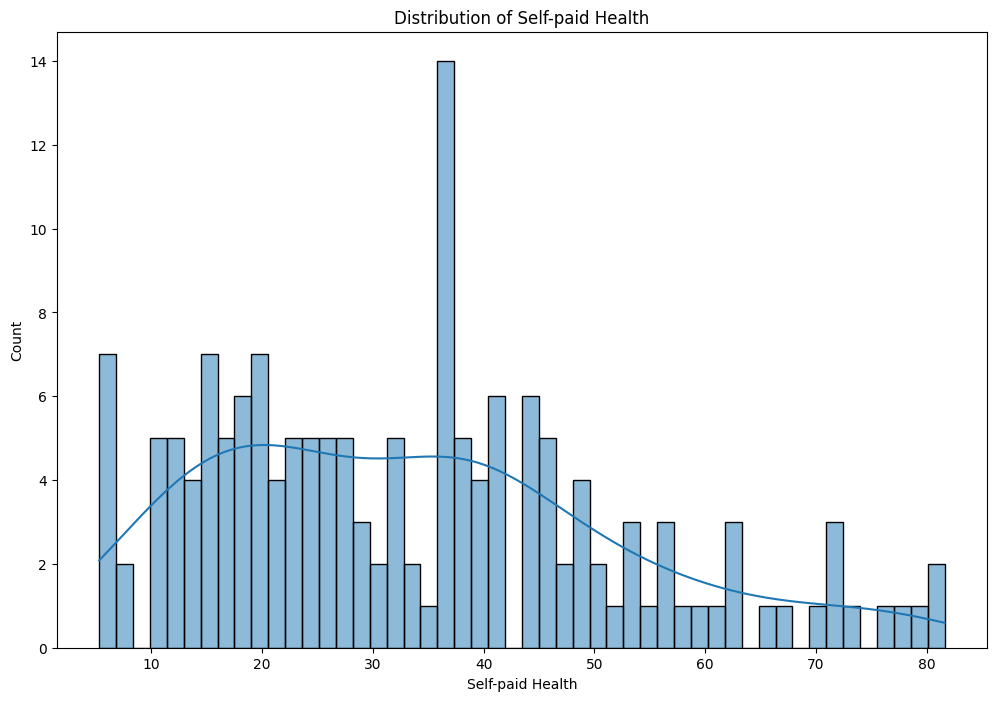

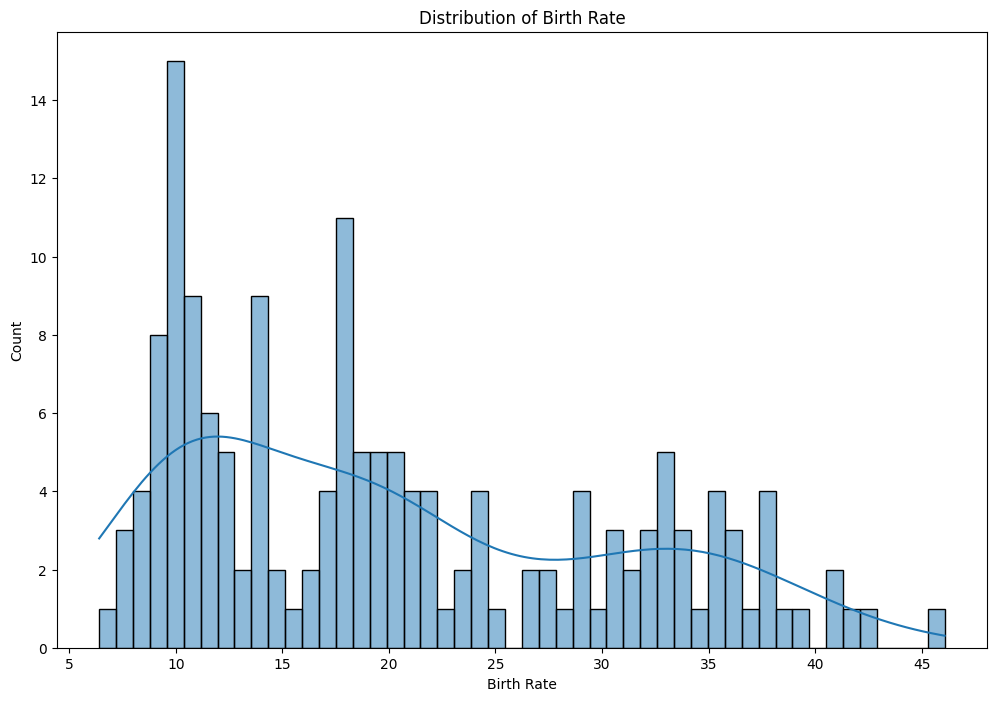

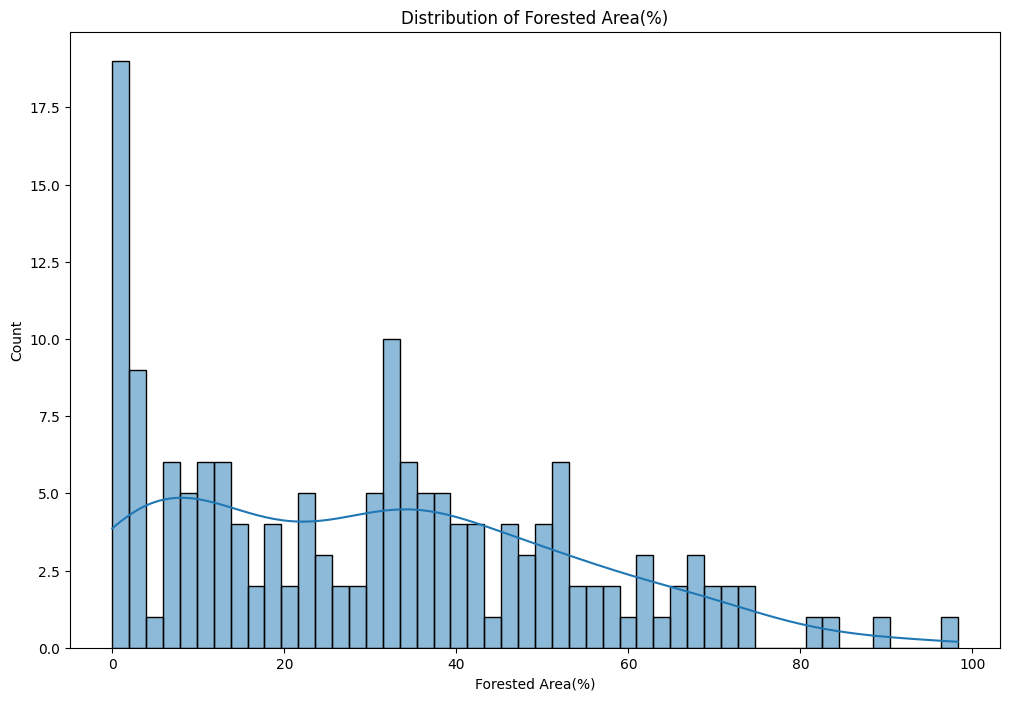

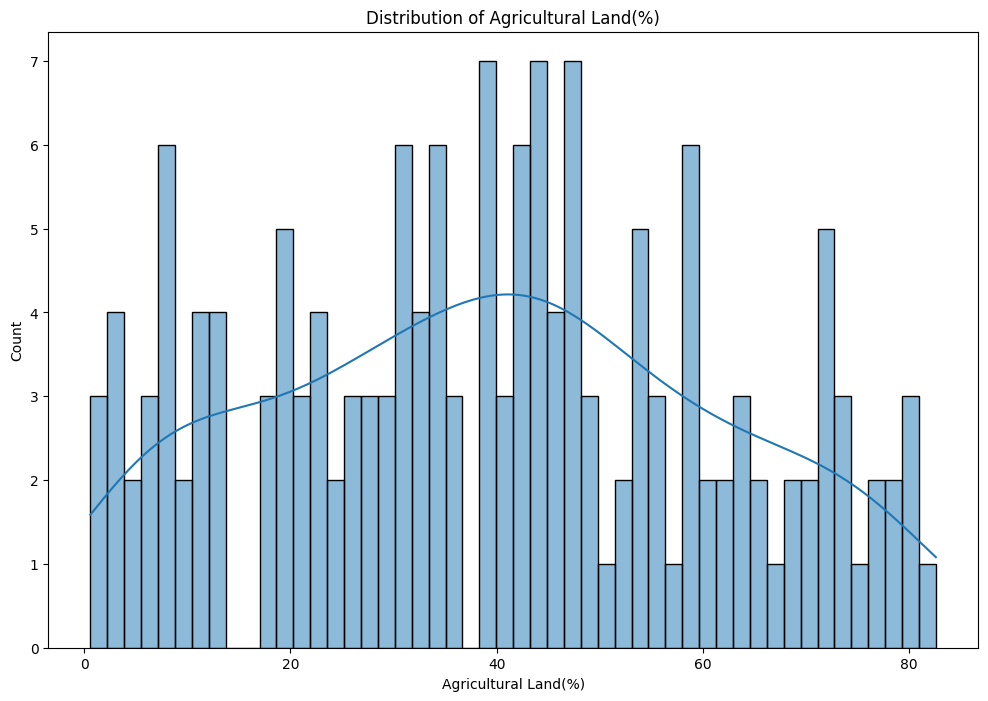

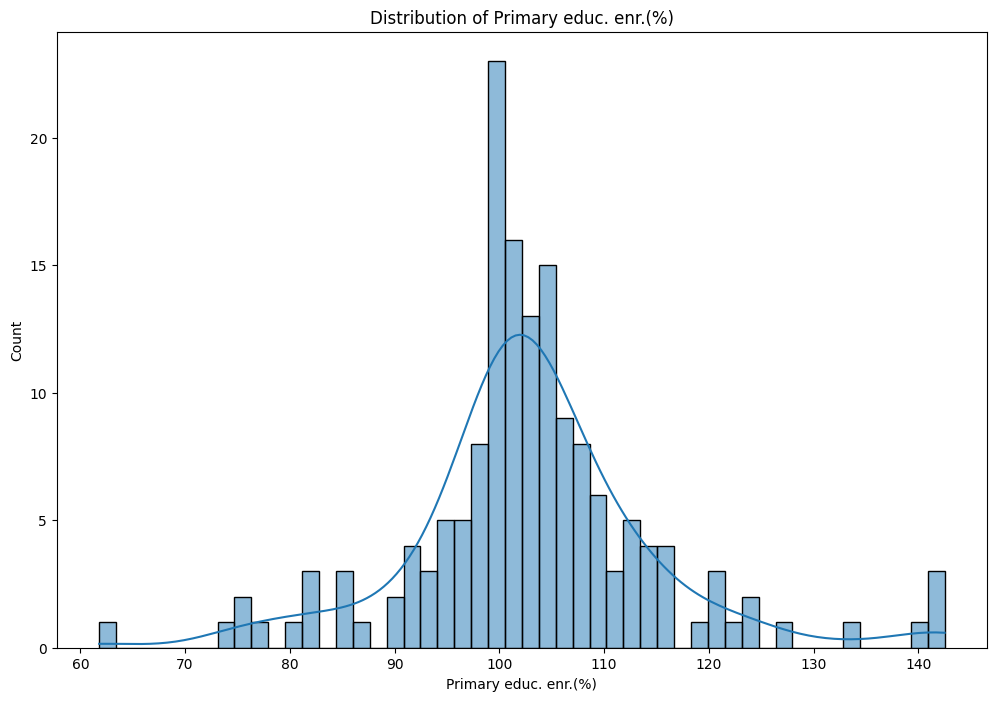

In [44]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

## data normalization

In [45]:
scaler = MinMaxScaler()

In [46]:
dataset_scaled = scaler.fit_transform(dataset.drop('Country',axis=1))

In [47]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns=dataset.drop('Country',axis=1).columns)

In [48]:
dataset_scaled

Density(P/Km2)  Armed Forces       GDP  Labor force participation(%)  \
0          0.379738      0.849978  0.274477                      0.223361   
1          0.449396      0.610081  0.251404                      0.362705   
2          0.232692      0.848721  0.500313                      0.065574   
3          0.276991      0.781937  0.439804                      0.809426   
4          0.225876      0.774686  0.600811                      0.477459   
..              ...           ...       ...                           ...   
154        0.302288      0.854003  0.608063                      0.444672   
155        0.586697      0.882141  0.544976                      0.807377   
156        0.371188      0.710022  0.309903                      0.000000   
157        0.272233      0.648629  0.293956                      0.750000   
158        0.323348      0.726300  0.286413                      0.924180   

     Unemployment rate  Total tax rate       CPI  Self-paid Health  \
0             0.392666        0.644964  0.124187          0.958060   
1             0.435742        0.290946  0.055106          0.676278   
2             0.413314        0.591048  0.127096          0.298820   
3             0.242079        0.418108  0.291677          0.368283   
4             0.345319        1.000000  0.256375          0.161206   
..                 ...             ...       ...               ...   
154           0.310075        0.664293  1.000000          0.530799   
155           0.068352        0.301119  0.150289          0.500655   
156           0.456390        0.189217  0.139181          0.992136   
157           0.403702        0.077314  0.228736          0.290957   
158           0.173015        0.240081  0.018959          0.268676   

     Birth Rate  Forested Area(%)  Agricultural Land(%)  Primary educ. enr.(%)  
0      0.657510          0.021363              0.701220               0.522924  
1      0.135585          0.285860              0.518293               0.560099  
2      0.450605          0.008138              0.204878               0.596035  
3      0.865171          0.471007              0.571951               0.640644  
4      0.267641          0.099695              0.654878               0.593556  
..          ...               ...                   ...                    ...  
154    0.289315          0.536114              0.291463               0.438662  
155    0.260837          0.489318              0.471951               0.604709  
156    0.606099          0.010173              0.536585               0.394052  
157    0.750756          0.663276              0.384146               0.457249  
158    0.611895          0.361139              0.503659               0.596035  

[159 rows x 12 columns]

In [49]:
dataset_scaled.insert(0,'Country',dataset['Country'].values)

In [50]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.274477   
1        Albania        0.449396      0.610081  0.251404   
2        Algeria        0.232692      0.848721  0.500313   
3         Angola        0.276991      0.781937  0.439804   
4      Argentina        0.225876      0.774686  0.600811   
..           ...             ...           ...       ...   
154    Venezuela        0.302288      0.854003  0.608063   
155      Vietnam        0.586697      0.882141  0.544976   
156        Yemen        0.371188      0.710022  0.309903   
157       Zambia        0.272233      0.648629  0.293956   
158     Zimbabwe        0.323348      0.726300  0.286413   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
154                      0.444672           0.310075        0.664293   
155                      0.807377           0.068352        0.301119   
156                      0.000000           0.456390        0.189217   
157                      0.750000           0.403702        0.077314   
158                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
154  1.000000          0.530799    0.289315          0.536114   
155  0.150289          0.500655    0.260837          0.489318   
156  0.139181          0.992136    0.606099          0.010173   
157  0.228736          0.290957    0.750756          0.663276   
158  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)  
0                0.701220               0.522924  
1                0.518293               0.560099  
2                0.204878               0.596035  
3                0.571951               0.640644  
4                0.654878               0.593556  
..                    ...                    ...  
154              0.291463               0.438662  
155              0.471951               0.604709  
156              0.536585               0.394052  
157              0.384146               0.457249  
158              0.503659               0.596035  

[159 rows x 13 columns]

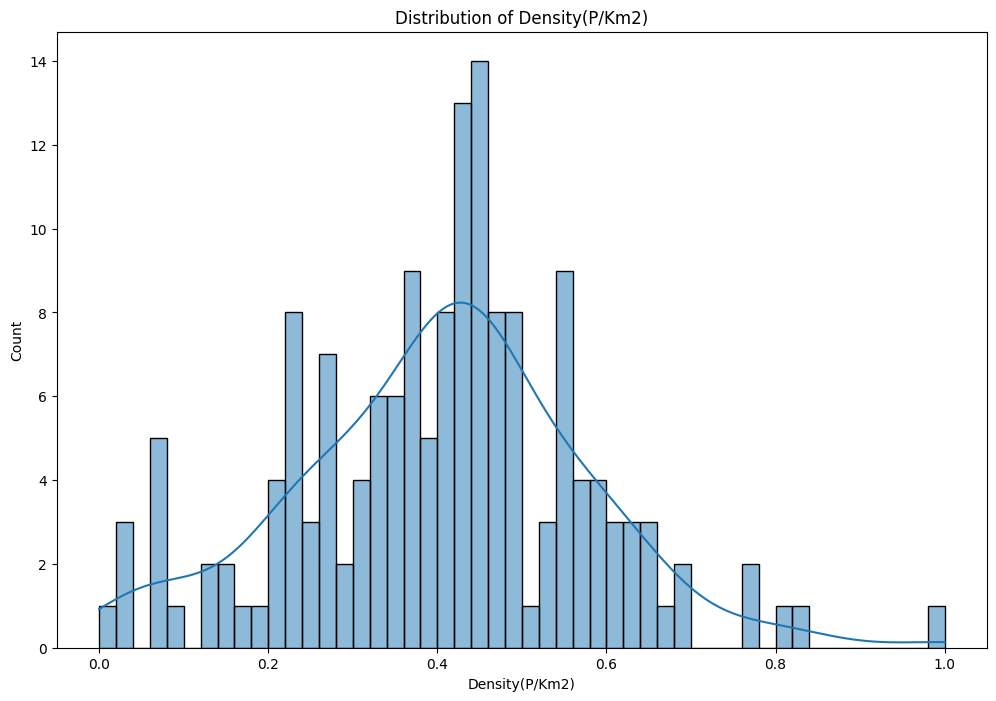

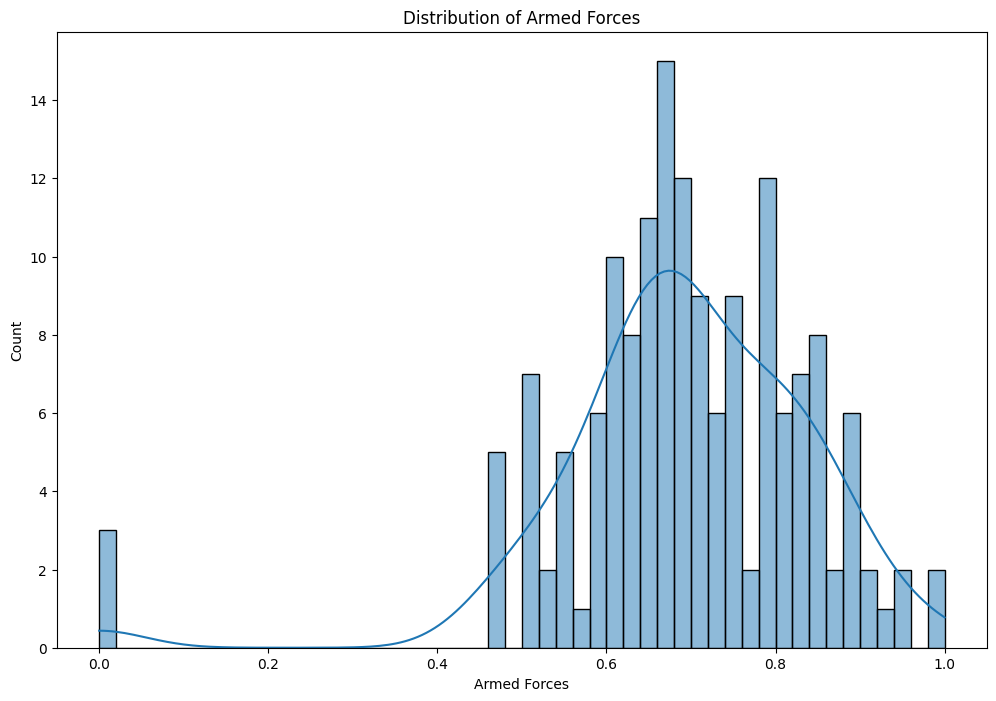

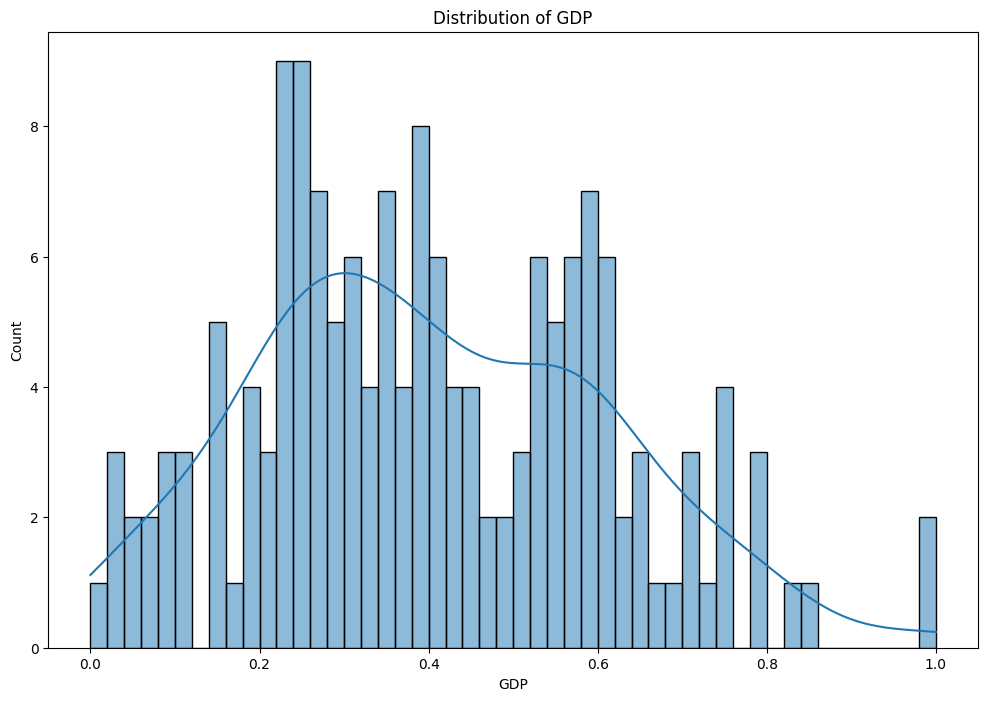

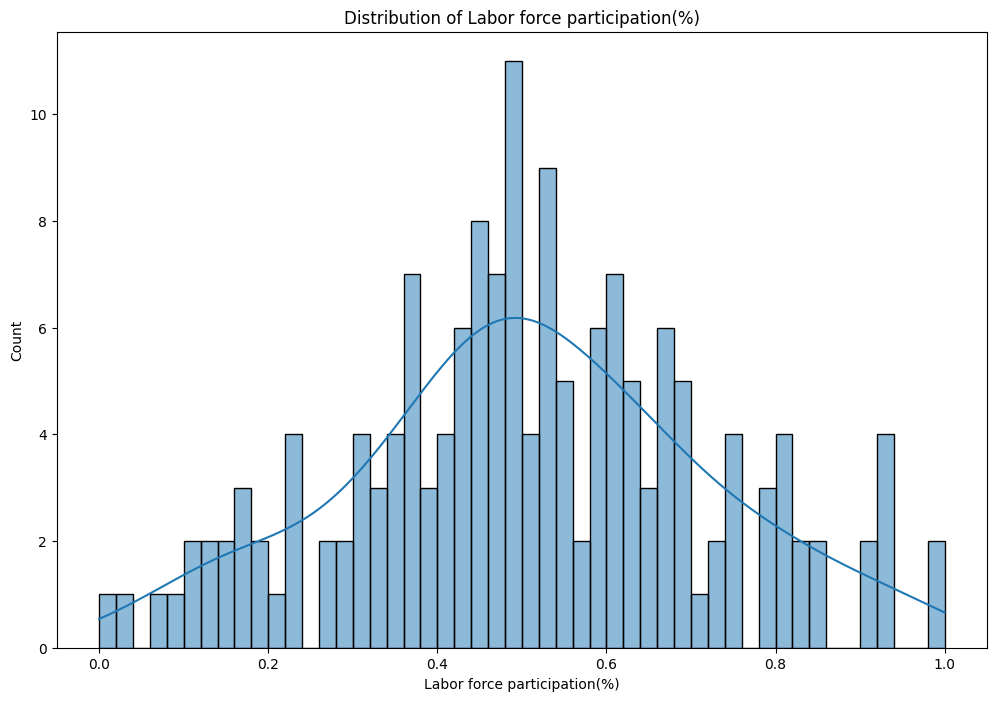

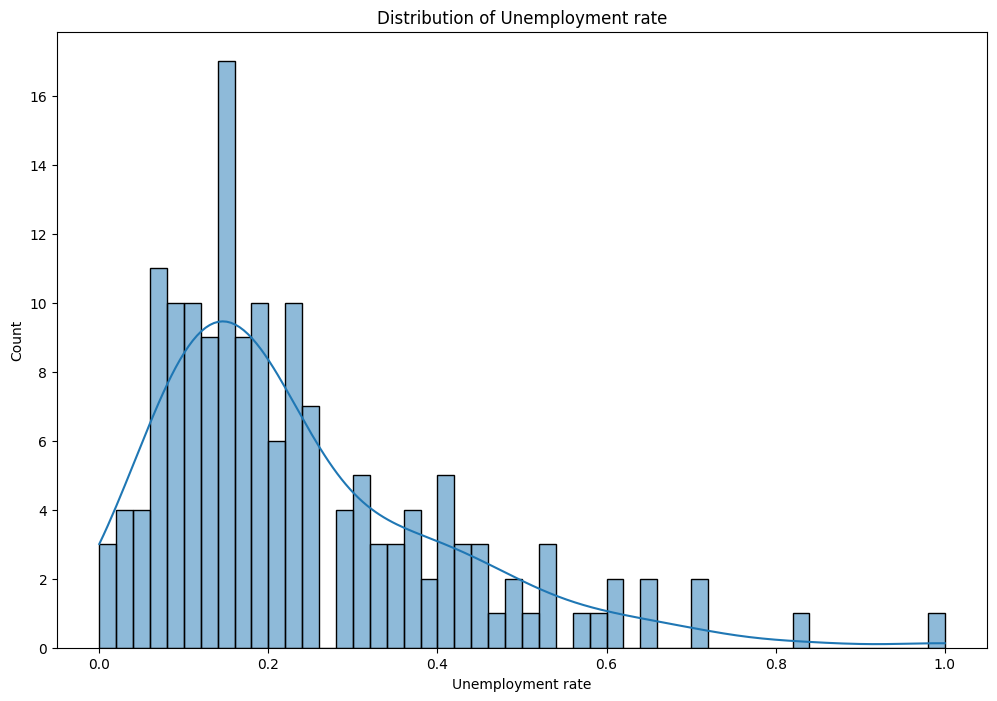

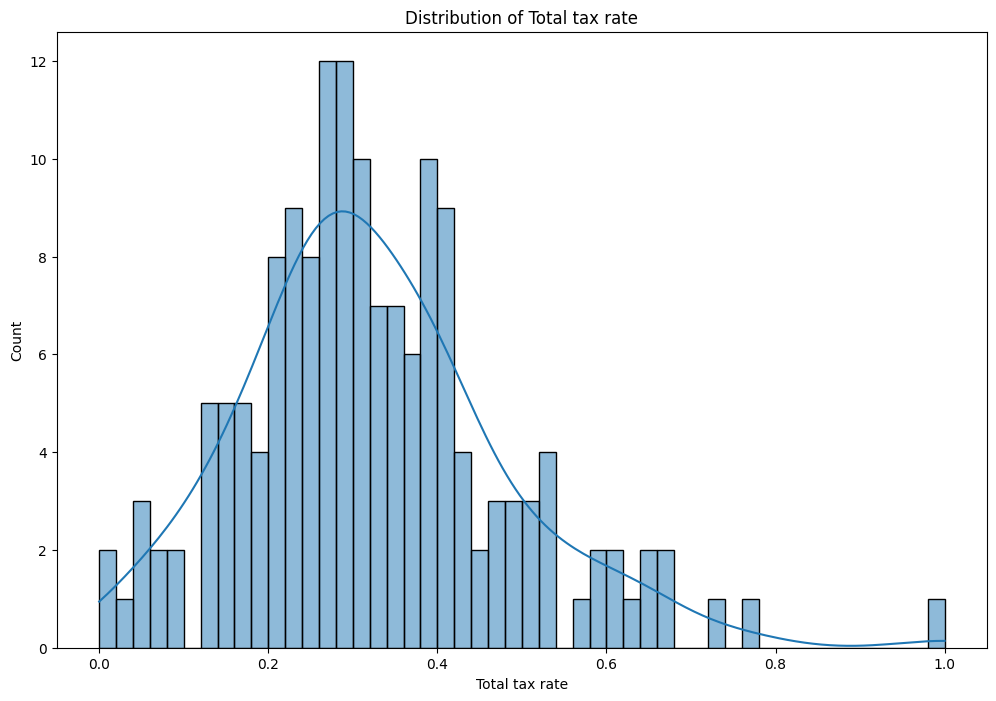

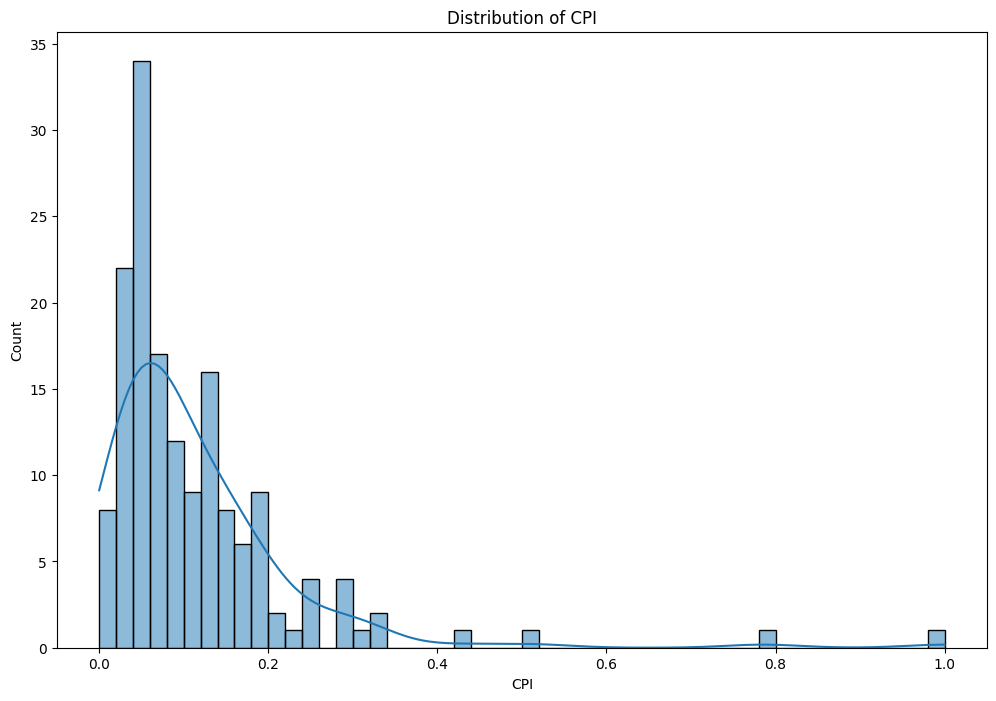

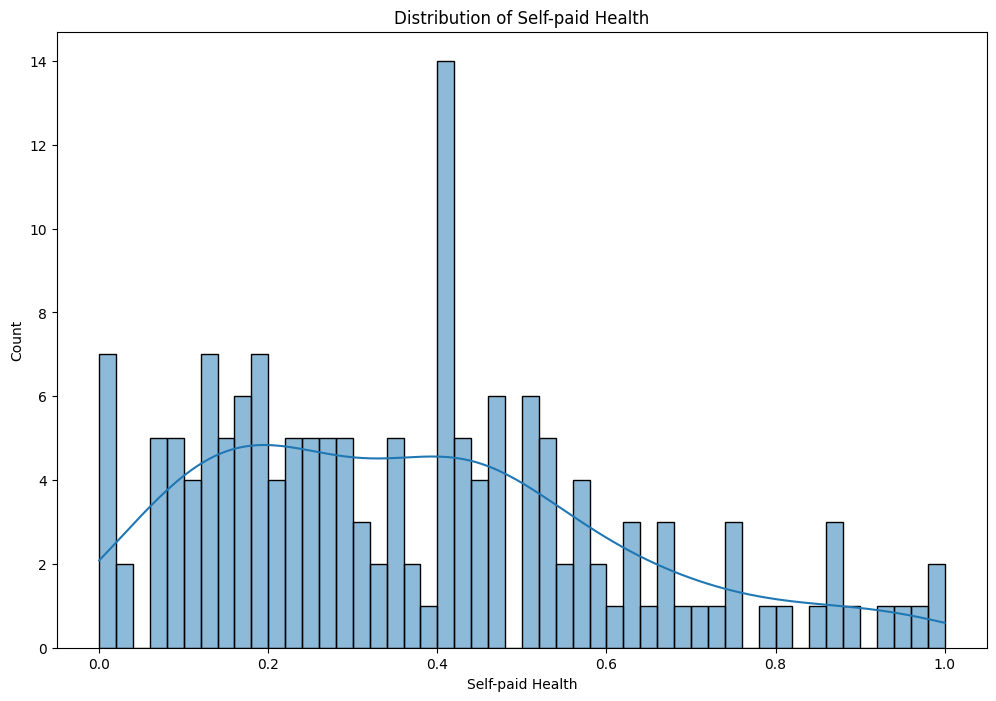

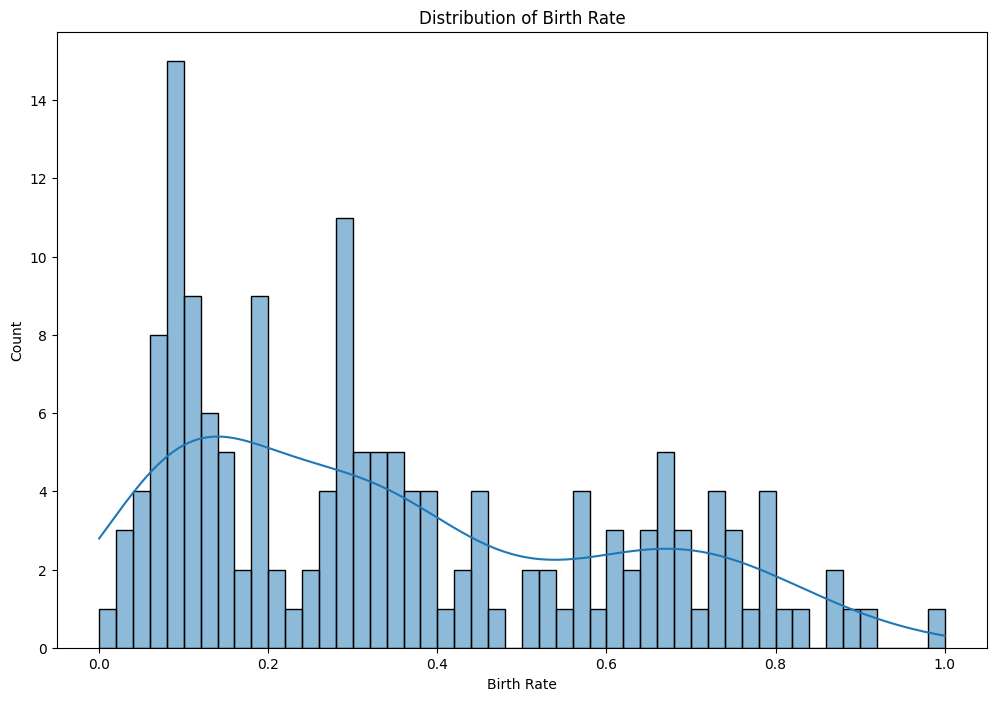

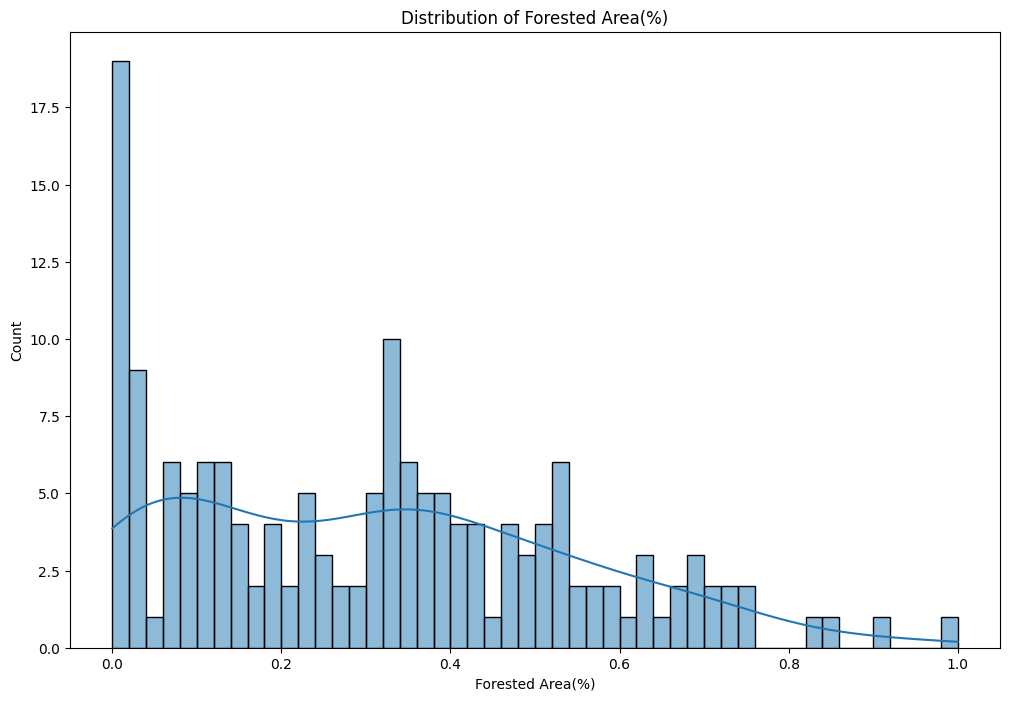

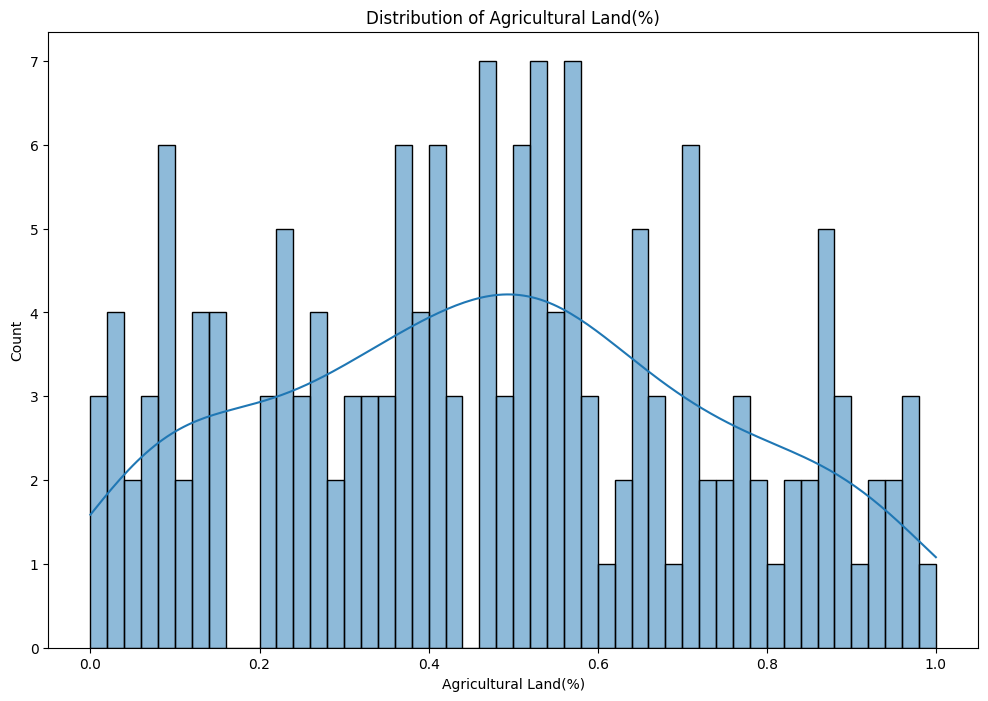

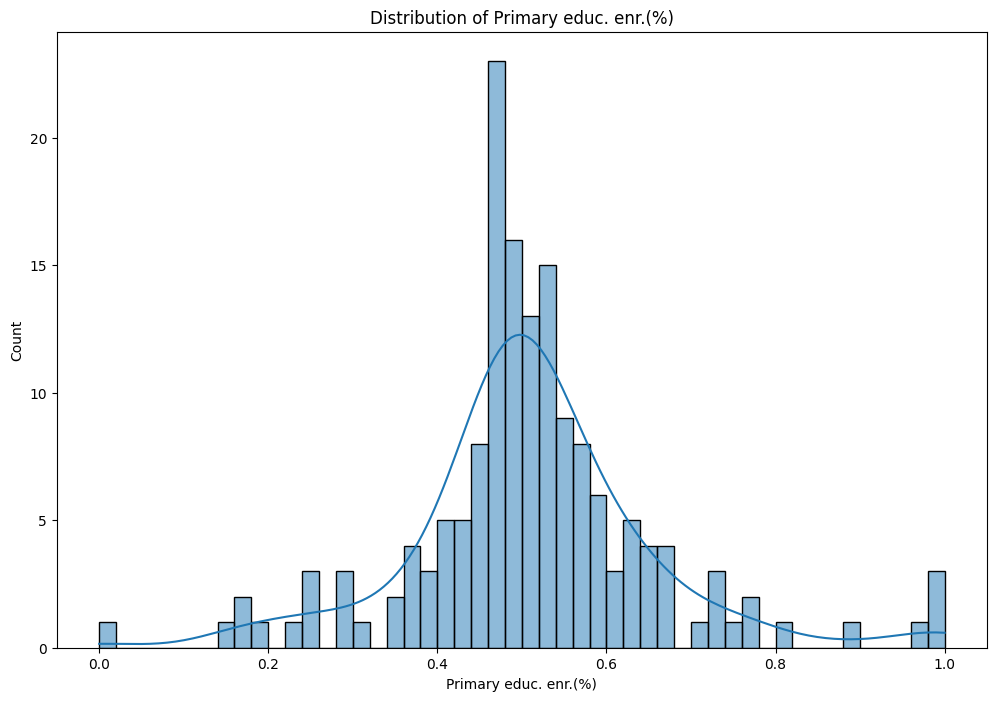

In [51]:
for i in dataset_scaled.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset_scaled[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

## plots

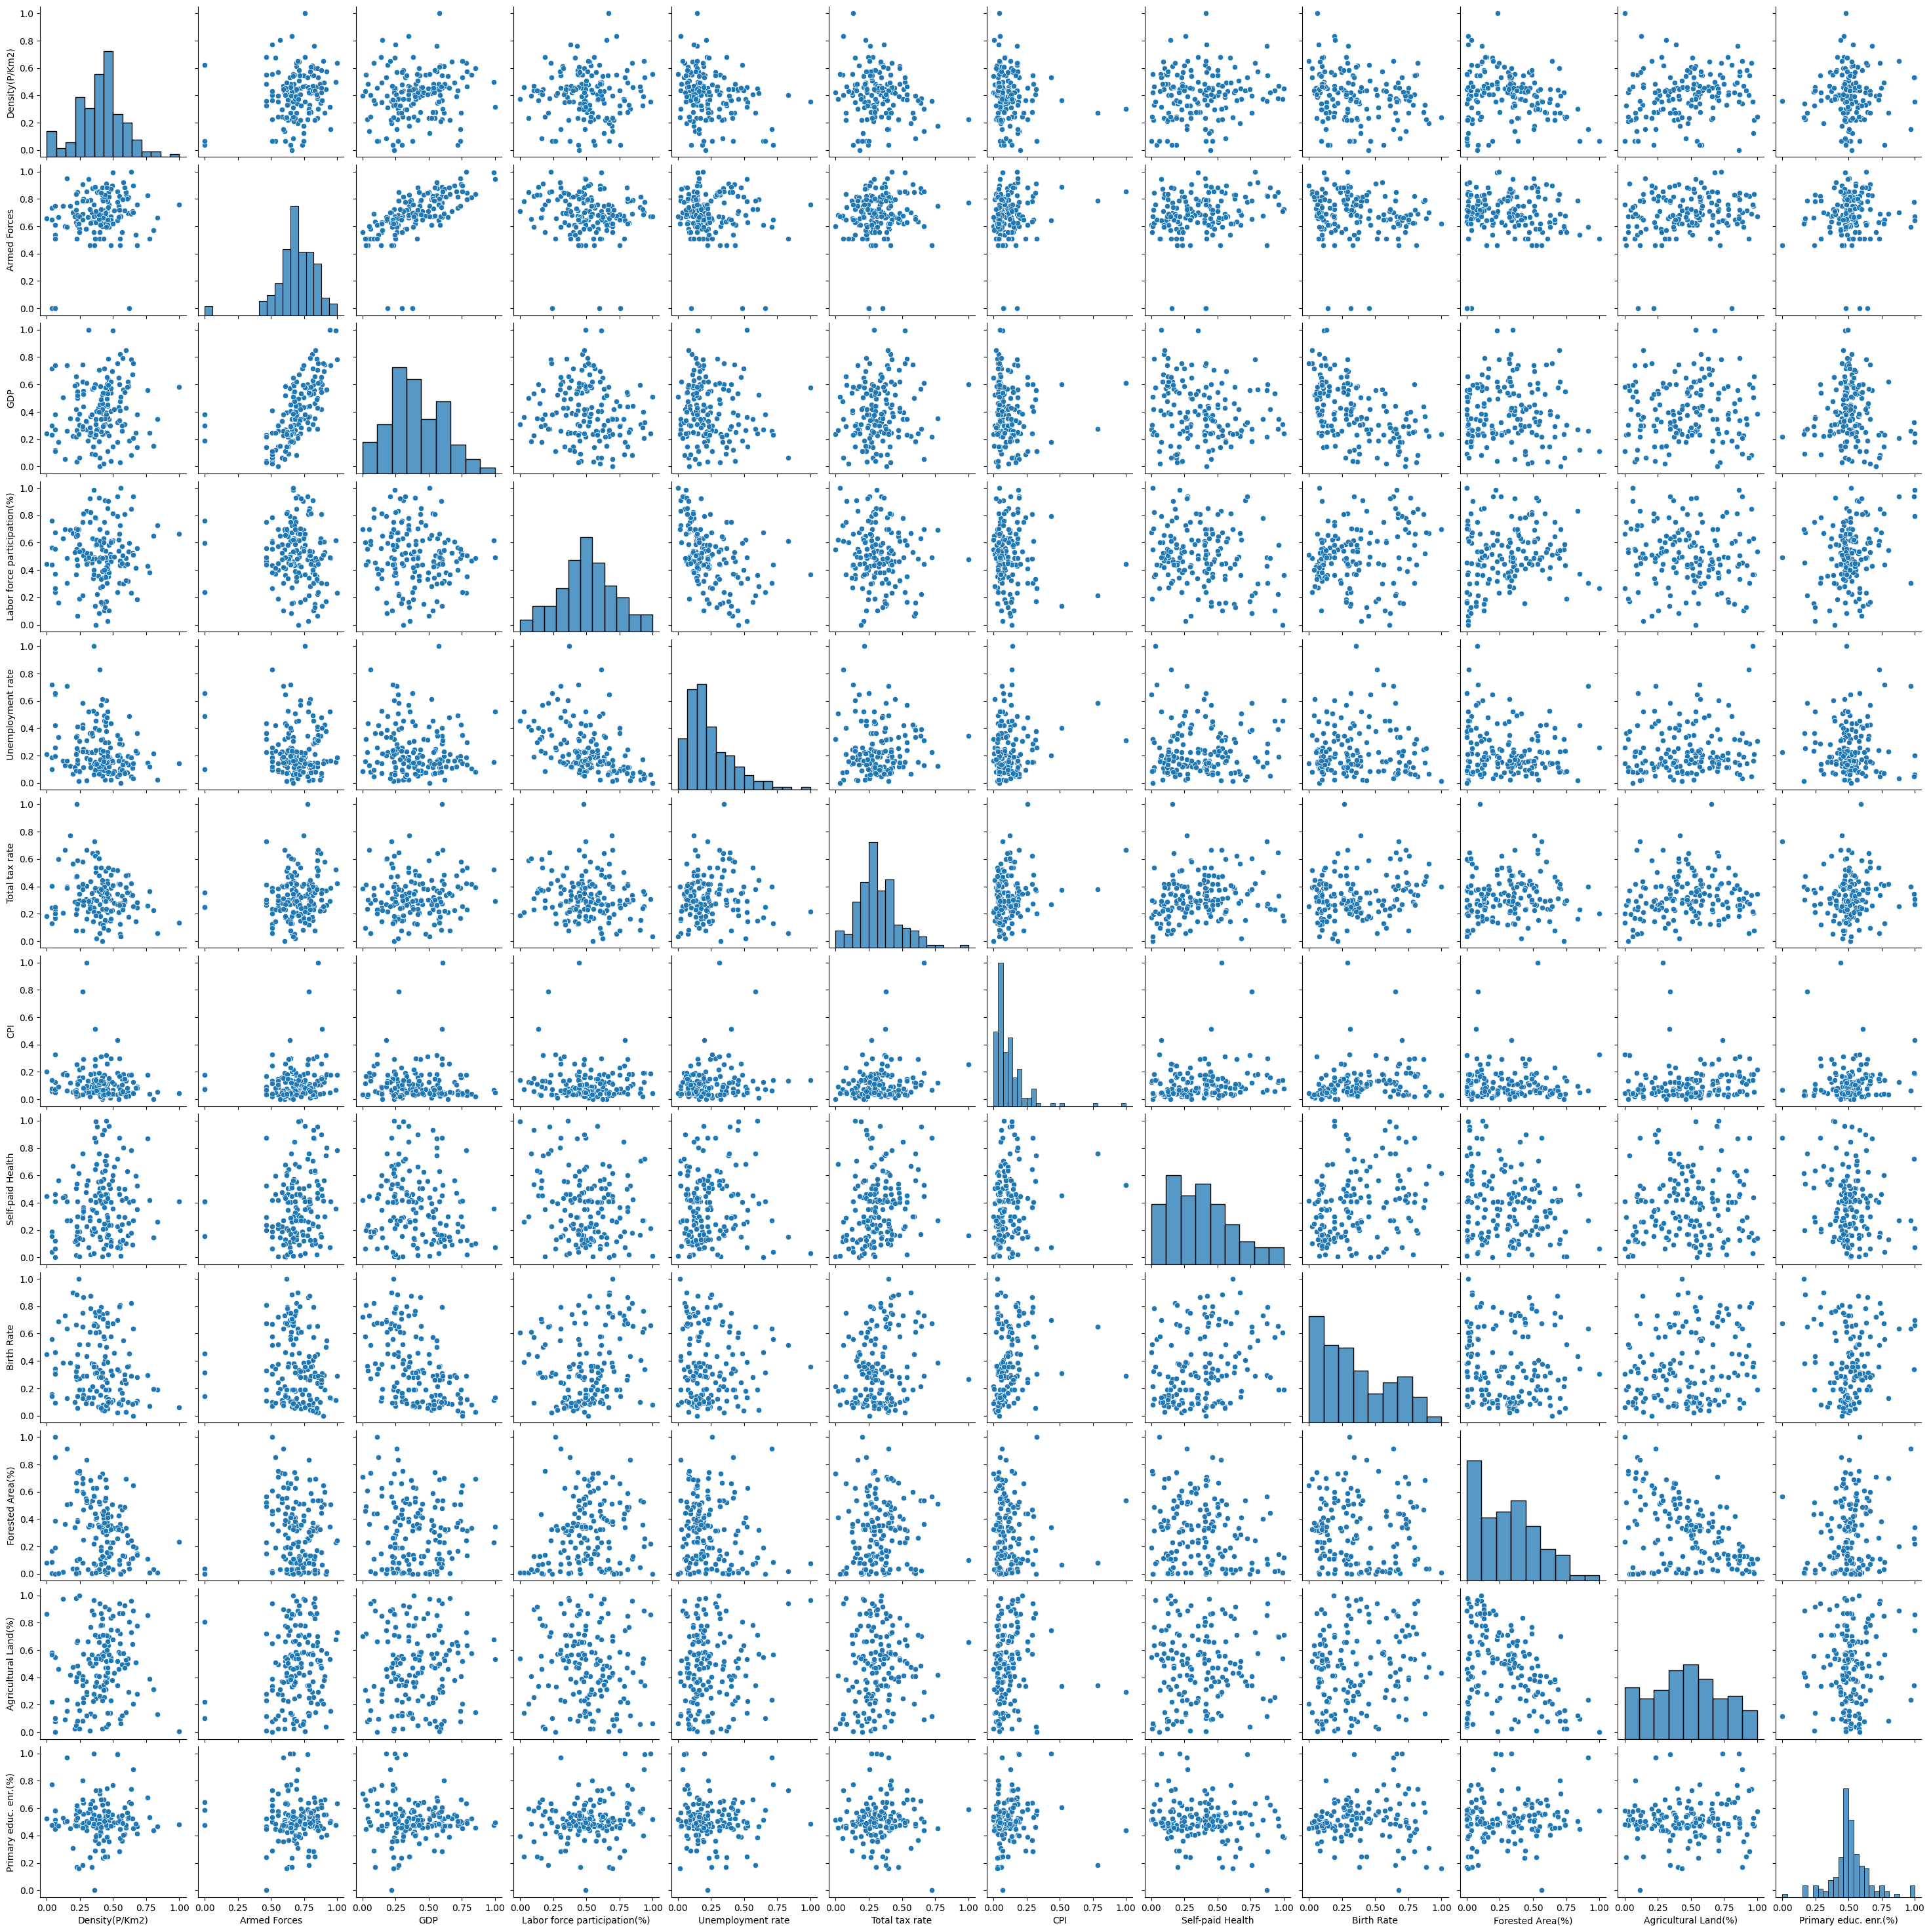

In [52]:
sns.pairplot(dataset_scaled)

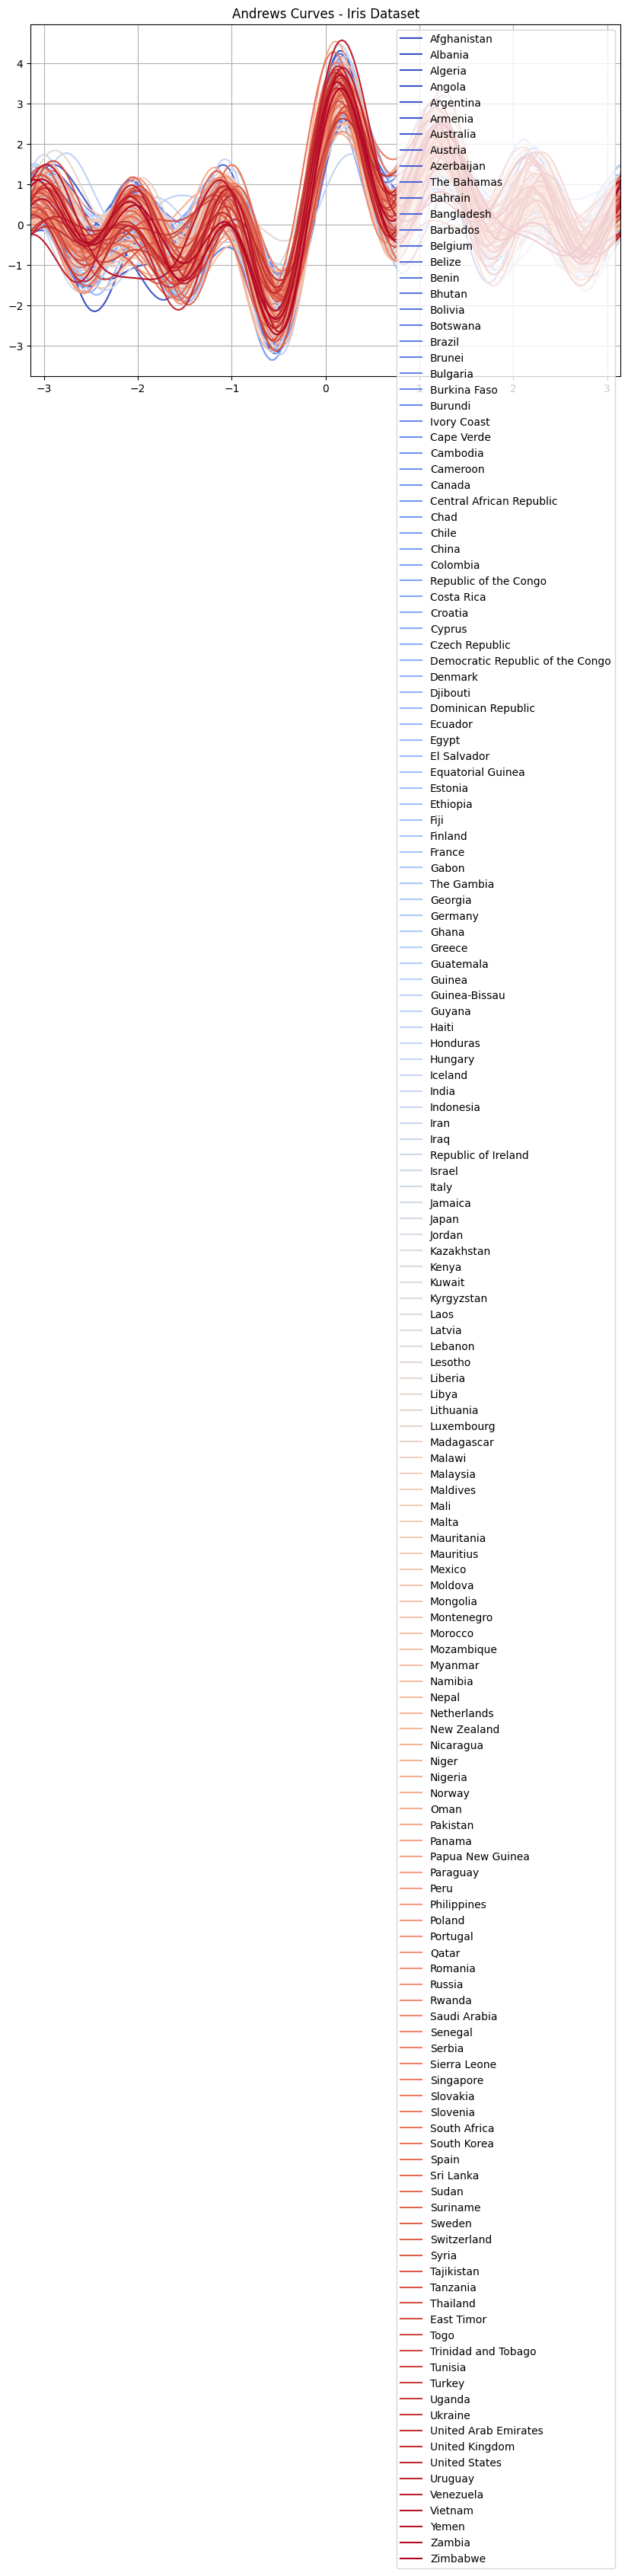

In [53]:
plt.figure(figsize=(10, 6))
andrews_curves(dataset_scaled, class_column="Country", colormap='coolwarm')
plt.title("Andrews Curves - Iris Dataset")
plt.show()